# Are we Seeing Deglobalization?

Much has been said regaurding the supposed trend towards deglobalization supposed to have taken place in the wake of the Covid-19 pandemic. If this is indeed the case, deglobalization would have profound impacts on the future of geoploitical strategy, macroeconomic investment, and security. For this purpose I've set out to analyse publicly avalible real world data in search of teltale signs of such a trend.# 

We need to evaluate each of the different categories for growth or decrease over the past 20 years

In [337]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [429]:
# Importing Data

# Getting World GDP, Exports, Impors Since 1990-2022 
# from the World Bank https://databank.worldbank.org/reports.aspx?source=2&series=NY.GDP.MKTP.CD&country=#
ggdp = pd.read_excel('C:/Users/Ian/Desktop/Data Analysis 12-23-23/WB_gGDP_data.xlsx') # this is in current US Dollars (2022)
exports = pd.read_excel('C:/Users/Ian/Desktop/Data Analysis 12-23-23/WB_Export_data.xlsx') # WB Export Data: https://data.worldbank.org/indicator/NE.EXP.GNFS.ZS?end=2022&start=1990
imports = pd.read_excel('C:/Users/Ian/Desktop/Data Analysis 12-23-23/WB_Import_data.xlsx') # WB Import Data: https://databank.worldbank.org/reports.aspx?source=2&series=BM.GSR.TOTL.CD&country=

# Percentages
exper = pd.read_excel('C:/Users/Ian/Desktop/Data Analysis 12-23-23/WB_Export%_data.xlsx') # %: https://databank.worldbank.org/reports.aspx?source=2&series=NE.EXP.GNFS.ZS&country=
imper = pd.read_excel('C:/Users/Ian/Desktop/Data Analysis 12-23-23/WB_Import%_data.xlsx') # %: https://data.worldbank.org/indicator/NE.IMP.GNFS.ZS?end=2022&start=1990

# Regional Data %
rexper = pd.read_excel('C:/Users/Ian/Desktop/Data Analysis 12-23-23/WB_Region_Export%_data.xlsx') #
rimper = pd.read_excel('C:/Users/Ian/Desktop/Data Analysis 12-23-23/WB_Region_Import%_data.xlsx') 

# Set max rows
pd.set_option('display.max_rows', 32) # show 300 rows
pd.set_option('display.max_columns', 15)



In [466]:
pd.set_option('display.max_rows', 38)
rexper

Series Name     Series Code    Time  \
0           Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  1990.0   
1           Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  1991.0   
2           Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  1992.0   
3           Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  1993.0   
4           Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  1994.0   
5           Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  1995.0   
6           Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  1996.0   
7           Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  1997.0   
8           Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  1998.0   
9           Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  1999.0   
10          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2000.0   
11          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2001.0   
12          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2002.0   
13          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2003.0   
14          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2004.0   
15          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2005.0   
16          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2006.0   
17          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2007.0   
18          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2008.0   
19          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2009.0   
20          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2010.0   
21          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2011.0   
22          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2012.0   
23          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2013.0   
24          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2014.0   
25          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2015.0   
26          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2016.0   
27          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2017.0   
28          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2018.0   
29          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2019.0   
30          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2020.0   
31          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2021.0   
32          Exports of goods and services (% of GDP)  NE.EXP.GNFS.ZS  2022.0   
33                                               NaN             NaN     NaN   
34                                               NaN             NaN     NaN   
35                                               NaN             NaN     NaN   
36  Data from database: World Development Indicators             NaN     NaN   
37                          Last Updated: 12/18/2023             NaN     NaN   

   Time Code  Africa Eastern and Southern [AFE]  \
0     YR1990                          20.970058   
1     YR1991                          19.040159   
2     YR1992                          22.187491   
3     YR1993                          23.488772   
4     YR1994                          24.594481   
5     YR1995                          25.281003   
6     YR1996                          26.470839   
7     YR1997                          25.513319   
8     YR1998                          25.608222   
9     YR1999                          25.523226   
10    YR2000                          26.371024   
11    YR2001                          27.761790   
12    YR2002                          28.202947   
13    YR2003                          26.032457   
14    YR2004                          26.097076   
15    YR2005                          27.957699   
16    YR2006                          29.913056   
17

In [405]:
pd.set_option("display.max_rows", 38)
ggdp

Series Name     Series Code    Time  \
0                                  GDP (current US$)  NY.GDP.MKTP.CD  1990.0   
1                                  GDP (current US$)  NY.GDP.MKTP.CD  1991.0   
2                                  GDP (current US$)  NY.GDP.MKTP.CD  1992.0   
3                                  GDP (current US$)  NY.GDP.MKTP.CD  1993.0   
4                                  GDP (current US$)  NY.GDP.MKTP.CD  1994.0   
5                                  GDP (current US$)  NY.GDP.MKTP.CD  1995.0   
6                                  GDP (current US$)  NY.GDP.MKTP.CD  1996.0   
7                                  GDP (current US$)  NY.GDP.MKTP.CD  1997.0   
8                                  GDP (current US$)  NY.GDP.MKTP.CD  1998.0   
9                                  GDP (current US$)  NY.GDP.MKTP.CD  1999.0   
10                                 GDP (current US$)  NY.GDP.MKTP.CD  2000.0   
11                                 GDP (current US$)  NY.GDP.MKTP.CD  2001.0   
12                                 GDP (current US$)  NY.GDP.MKTP.CD  2002.0   
13                                 GDP (current US$)  NY.GDP.MKTP.CD  2003.0   
14                                 GDP (current US$)  NY.GDP.MKTP.CD  2004.0   
15                                 GDP (current US$)  NY.GDP.MKTP.CD  2005.0   
16                                 GDP (current US$)  NY.GDP.MKTP.CD  2006.0   
17                                 GDP (current US$)  NY.GDP.MKTP.CD  2007.0   
18                                 GDP (current US$)  NY.GDP.MKTP.CD  2008.0   
19                                 GDP (current US$)  NY.GDP.MKTP.CD  2009.0   
20                                 GDP (current US$)  NY.GDP.MKTP.CD  2010.0   
21                                 GDP (current US$)  NY.GDP.MKTP.CD  2011.0   
22                                 GDP (current US$)  NY.GDP.MKTP.CD  2012.0   
23                                 GDP (current US$)  NY.GDP.MKTP.CD  2013.0   
24                                 GDP (current US$)  NY.GDP.MKTP.CD  2014.0   
25                                 GDP (current US$)  NY.GDP.MKTP.CD  2015.0   
26                                 GDP (current US$)  NY.GDP.MKTP.CD  2016.0   
27                                 GDP (current US$)  NY.GDP.MKTP.CD  2017.0   
28                                 GDP (current US$)  NY.GDP.MKTP.CD  2018.0   
29                                 GDP (current US$)  NY.GDP.MKTP.CD  2019.0   
30                                 GDP (current US$)  NY.GDP.MKTP.CD  2020.0   
31                                 GDP (current US$)  NY.GDP.MKTP.CD  2021.0   
32                                 GDP (current US$)  NY.GDP.MKTP.CD  2022.0   
33                                               NaN             NaN     NaN   
34                                               NaN             NaN     NaN   
35                                               NaN             NaN     NaN   
36  Data from database: World Development Indicators             NaN     NaN   
37                          Last Updated: 12/18/2023             NaN     NaN   

   Time Code   Afghanistan [AFG]  Albania [ALB]  Algeria [DZA]  ...  \
0     YR1990                  ..   2.028554e+09   6.204851e+10  ...   
1     YR1991                  ..   1.099559e+09   4.571568e+10  ...   
2     YR1992                  ..   6.521750e+08   4.800313e+10  ...   
3     YR1993                  ..   1.185315e+09   4.994558e+10  ...   
4     YR1994                  ..   1.880951e+09   4.254318e+10  ...   
5     YR1995                  ..   2.392765e+09   4.176429e+10  ...   
6     YR1996                  ..   3.199641e+09   4.694155e+10  ...   
7     YR1997                  ..   2.258514e+09   4.817761e+10  ...   
8     YR1998                  ..   2.545965e+09   4.818778e+10  ...   
9     YR1999                  ..   3.212122e+09   4.864067e+10  ...   
10    YR2000                  ..   3.480355e+09   5.479040e+10  ...   
11    YR2001                  ..   3.922101e+09   5.474470e+10  ... 

In [432]:
# Cleaning Data

def clean(i):
    i = i.drop(columns = ["Series Name", "Series Code", "Time Code"])
    i = i.drop(index=[33,34,35,36,37])
    i = i.rename(columns = {'Time':'Year'})
    i.replace('..', np.nan, inplace=True)
    i = i.dropna(axis=1)
    i["Year"]  = i["Year"].astype(int)
    i.set_index("Year", inplace=True)
    return i

ggdp1 = clean(ggdp)
exports1 = clean(exports)
imports1 = clean(imports)
exper1 = clean(exper)
imper1 = clean(imper)
rexper1 = clean(rexper)
rimper1 = clean(rimper)

In [433]:
rimper1

Africa Eastern and Southern [AFE]  Early-demographic dividend [EAR]  \
Year                                                                        
1990                          20.213062                         19.519377   
1991                          19.988744                         20.382678   
1992                          21.780670                         21.107012   
1993                          22.010816                         20.278112   
1994                          24.985294                         20.370851   
...                                 ...                               ...   
2018                          28.326005                         27.809847   
2019                          26.601743                         26.380132   
2020                          24.048661                         23.981222   
2021                          26.181158                         27.120095   
2022                          29.607497                         29.780741   

      East Asia & Pacific [EAS]  \
Year                              
1990                  16.775098   
1991                  16.297716   
1992                  16.138208   
1993                  15.694790   
1994                  16.703543   
...                         ...   
2018                  27.607326   
2019                  26.298399   
2020                  24.048520   
2021                  26.381390   
2022                  28.828531   

      East Asia & Pacific (excluding high income) [EAP]  \
Year                                                      
1990                                          21.971666   
1991                                          23.886769   
1992                                          24.125506   
1993                                          24.334398   
1994                                          28.892296   
...                                                 ...   
2018                                          22.662423   
2019                                          21.432639   
2020                                          19.562945   
2021                                          21.235299   
2022                                          22.082624   

      East Asia & Pacific (IDA & IBRD countries) [TEA]  Euro area [EMU]  \
Year                                                                      
1990                                         21.956814        25.461703   
1991                                         23.870623        25.332296   
1992                                         24.109199        24.731692   
1993                                         24.317949        23.496911   
1994                                         28.872766        24.776954   
...                                                ...              ...   
2018                                         22.647505        44.044946   
2019                                         21.418599        44.819703   
2020                                         19.550151        41.747290   
2021                                         21.221380        45.461551   
2022                                         22.068269        53.248120   

      Europe & Central Asia [ECS]  ...  South Asia [SAS]  \
Year                               ...                     
1990                    25.900076  ...         10.966161   
1991                    24.899779  ...         11.293339   
1992                    26.437736  ...         12.474240   
1993                    24.999690  ...         13.337663   
1994                    25.831008  ...         13.035469   
...                           ...  ...               ...   
2018                    41.563555  ...         23.453838   
2019                    41.935925  ...         21.443083   
2020                    39.413597  ...         19.050621   
2021                    42.095231  ...         23.236185   
2022                    47.555146  ...         25.930167   

      South Asia (IDA &

In [367]:
# What percent of global GDP was lost?
a = ggdp1.loc[2022].sum() # 98.3 trillion global gdp in world_1 vs. 101.0 in reality
b = 
#N/A
print(100 - ((a/101000000000000)*100),"% of Global GDP was lost")


2.6579779808244552 % of Global GDP was lost


In [ ]:
# What percent of global GDP was lost?
a = ggdp1.loc[2022].sum() # 98.3 trillion global gdp in world_1 vs. 101.0 in reality 
#N/A
print(100 - ((a/101000000000000)*100),"% of Global GDP was lost")


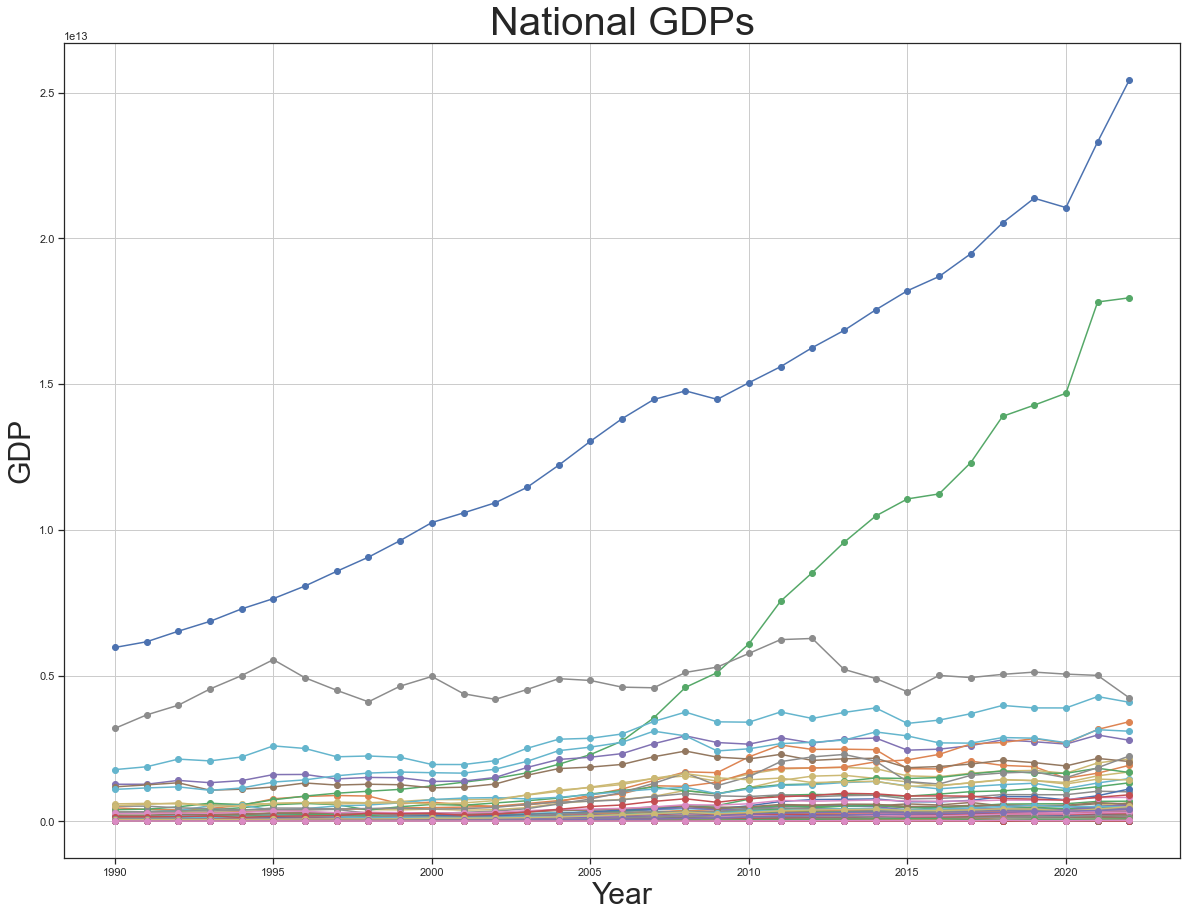

In [428]:
# Create a line plot using Matplotlib
plt.figure(figsize=(20, 15))

# Iterate over columns and plot each as a separate line
for col in ggdp1.columns:  # Exclude the first column ('Name') from the iteration
    plt.plot(ggdp1.index, ggdp1[col], marker='o', label=col)

# Customize the plot
plt.title('National GDPs', fontsize = 40)
plt.xlabel('Year', fontsize = 30)
plt.ylabel('GDP', fontsize = 30)
#plt.legend(title='Columns', loc='upper right')
plt.grid(True)
plt.show()

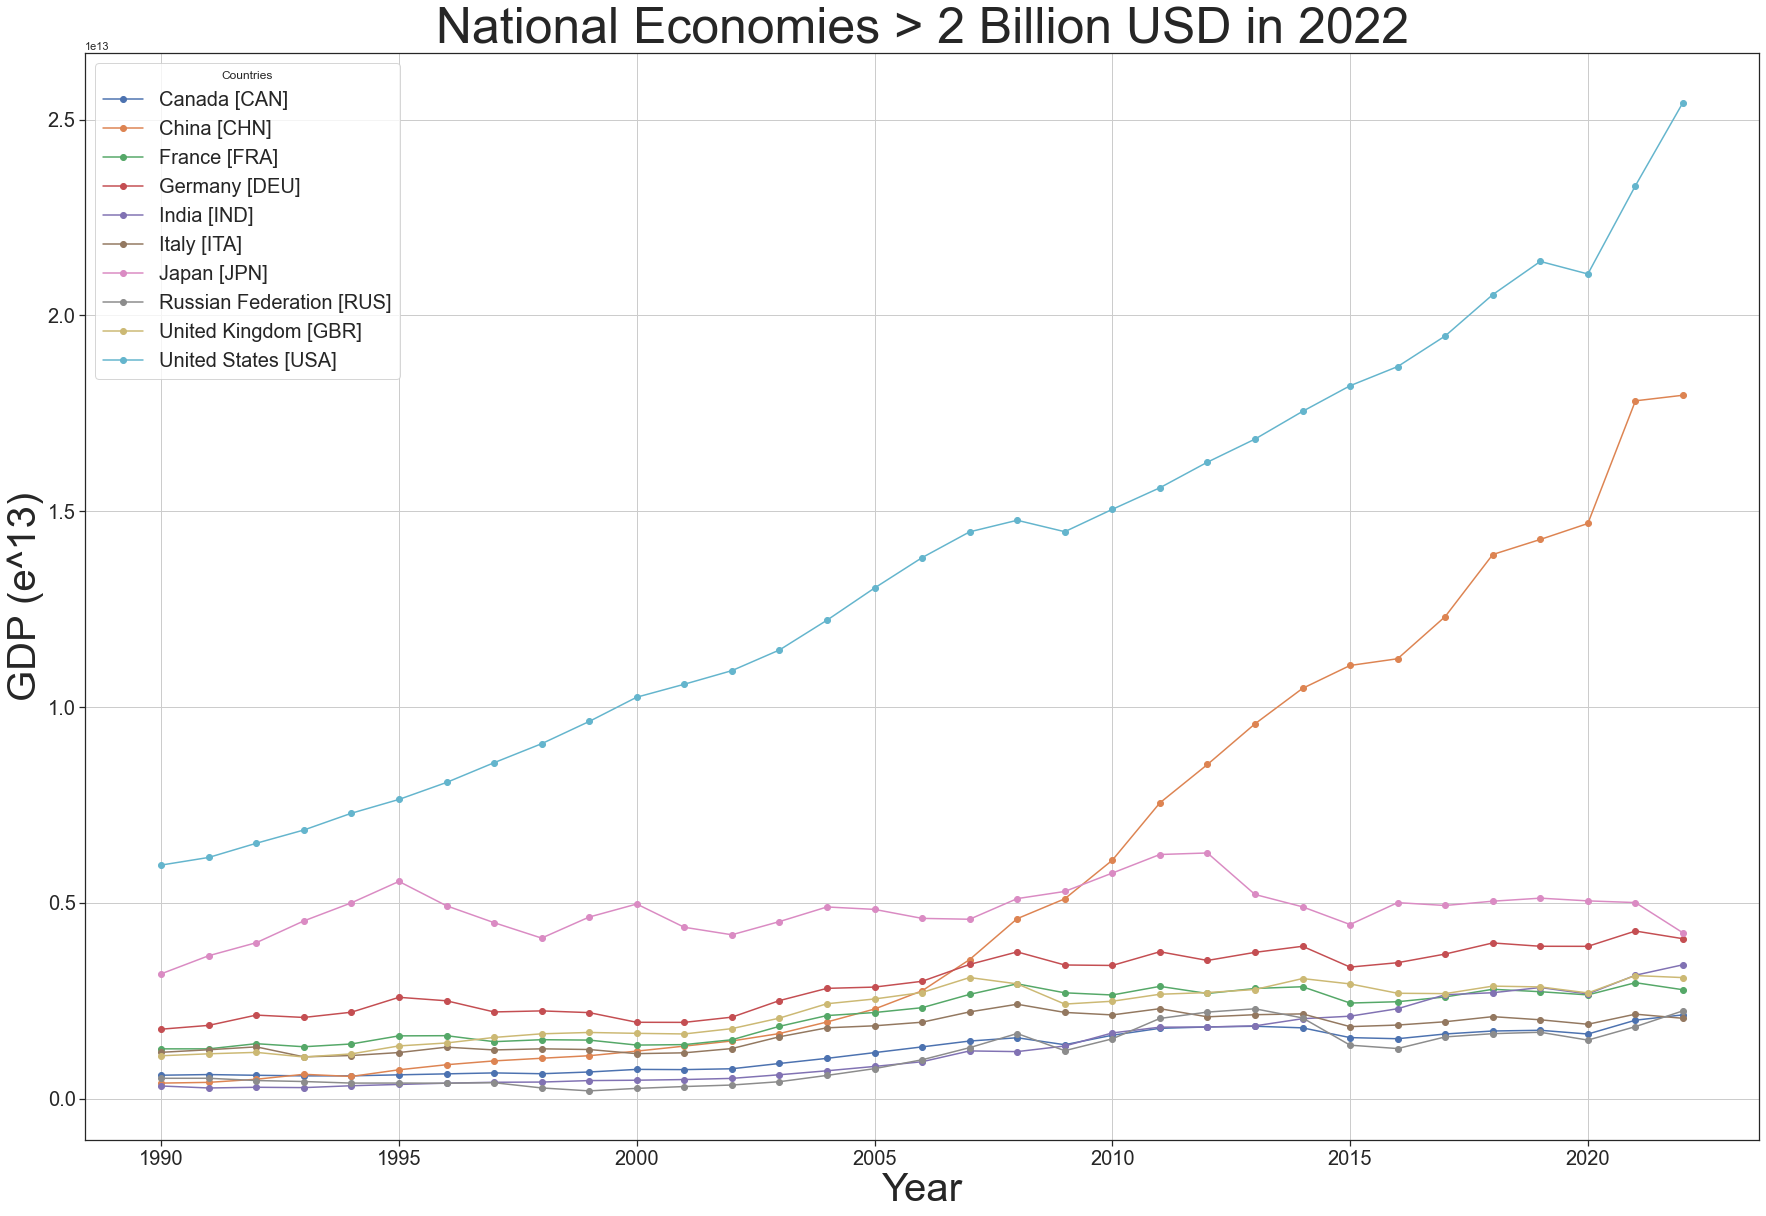

In [475]:
# sub setting out economies larger than 2 bill that are not USA or China
ggdp2 = ggdp1.loc[:,ggdp1.loc[2022] > 2000000000000]

# Create a line plot using Matplotlib
plt.figure(figsize=(30, 20))

# Iterate over columns and plot each as a separate line
for col in ggdp2.columns:  # Exclude the first column ('Name') from the iteration
    plt.plot(ggdp2.index, ggdp2[col], marker='o', label=col)

# Customize the plot
plt.title('National Economies > 2 Billion USD in 2022', fontsize=50)
plt.xlabel('Year', fontsize=40)
plt.ylabel('GDP (e^13)', fontsize=40)
plt.legend(title='Countries', loc='upper left', fontsize = 20)
plt.grid(True)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20)  

plt.show()

In [406]:
# What is the GDP growth of the world outside US and China?

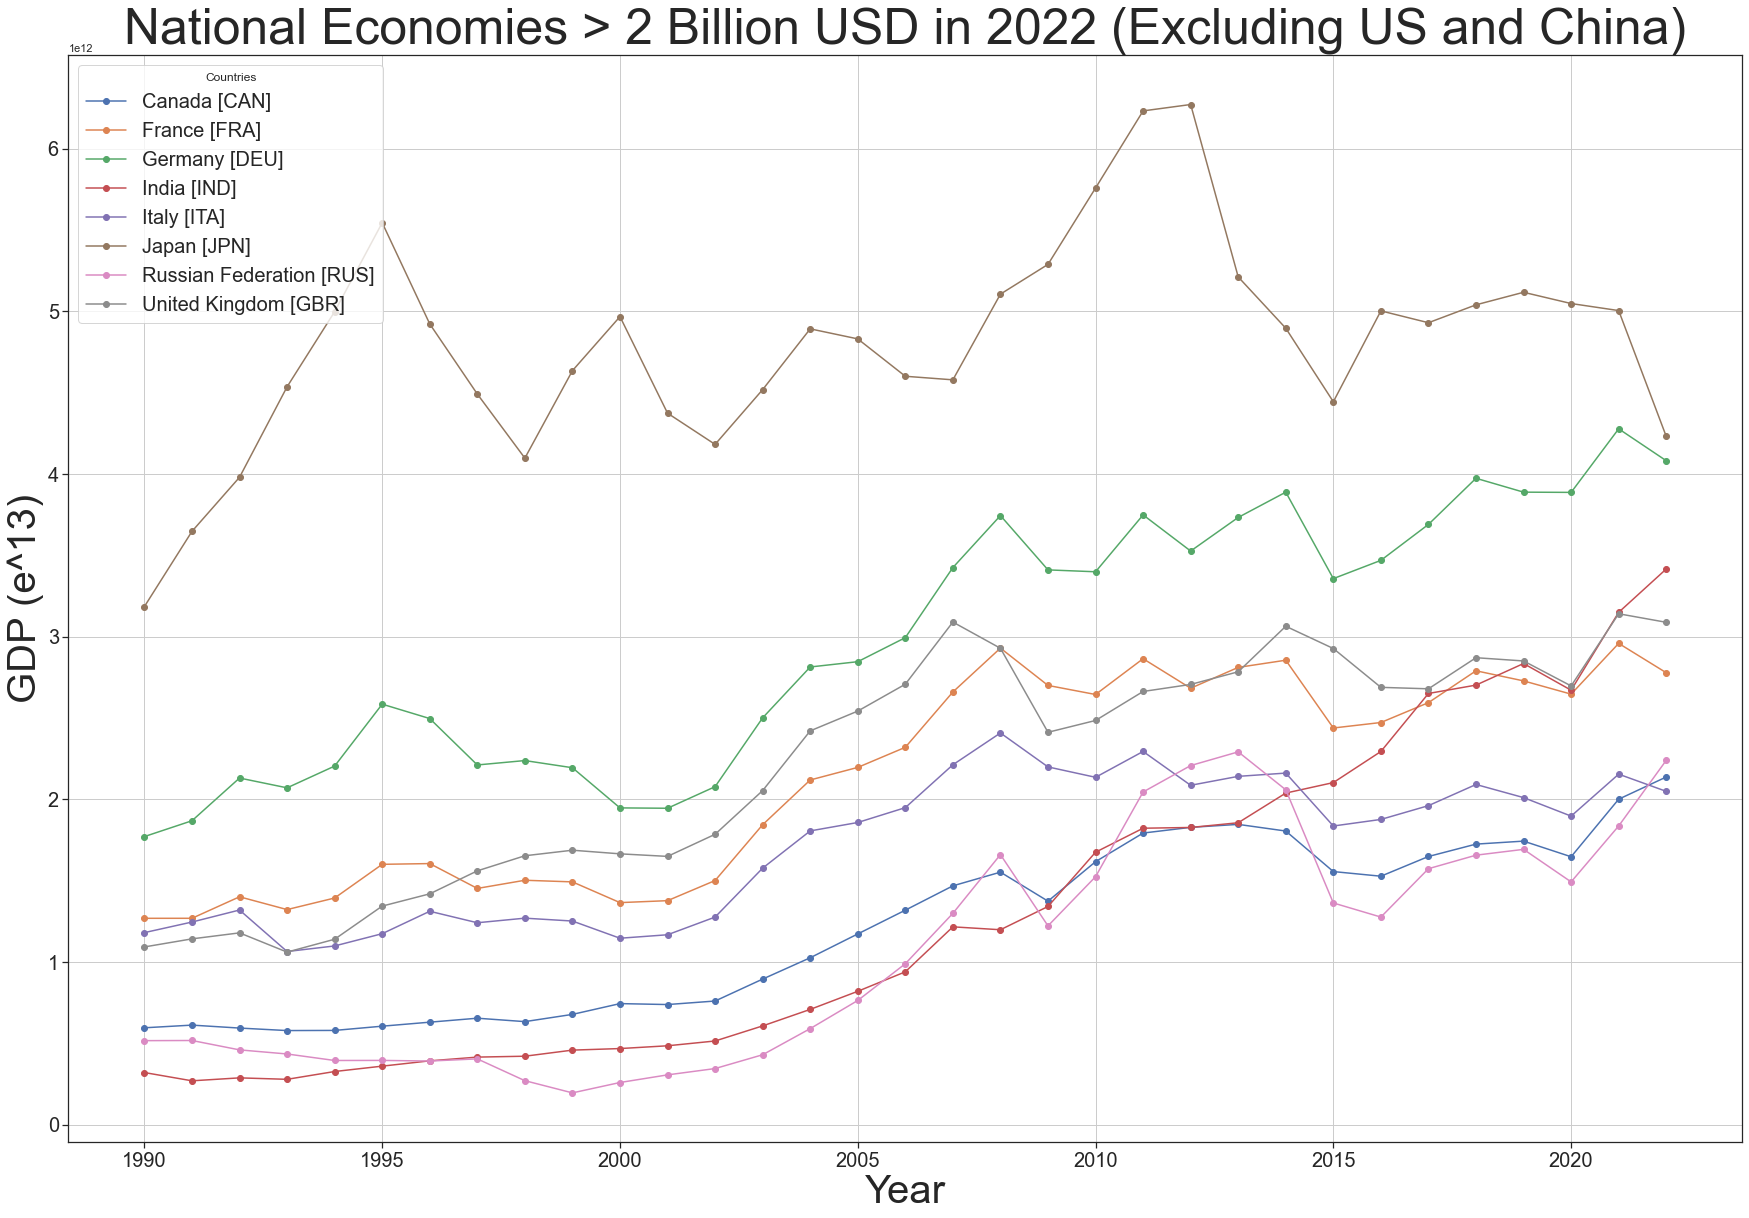

In [426]:
# sub setting out economies larger than 2 bill that are not USA or China
ggdp2a = ggdp2.drop(columns= ['United States [USA]', 'China [CHN]'])
#ggdp2 = ggdp2.loc[:,ggdp2.loc[2022] > 2000000000000]

# Create a line plot using Matplotlib
plt.figure(figsize=(30, 20))

# Iterate over columns and plot each as a separate line
for col in ggdp2a.columns:  # Exclude the first column ('Name') from the iteration
    plt.plot(ggdp2a.index, ggdp2a[col], marker='o', label=col)

# Customize the plot
plt.title('National Economies > 2 Billion USD in 2022 (Excluding US and China)', fontsize=50)
plt.xlabel('Year', fontsize=40)
plt.ylabel('GDP (e^13)', fontsize=40)
plt.legend(title='Countries', loc='upper left', fontsize = 20)
plt.grid(True)
plt.xticks(fontsize=20) 
plt.yticks(fontsize=20) 
plt.show()

In [ ]:
# What is the 

In [399]:
exper1

Albania [ALB]  Algeria [DZA]  Argentina [ARG]  Armenia [ARM]  \
Year                                                                 
1990      15.405064      23.443685        10.359537      35.002982   
1991       7.484819      29.117822         7.675043      40.745388   
1992      12.499591      25.319594         6.598187      39.820755   
1993      15.978830      21.783877         6.909352      47.218976   
1994      11.983694      22.530725         7.529949      39.328039   
...             ...            ...              ...            ...   
2018      31.571954      25.861181        14.436686      39.392894   
2019      31.304270      22.714413        17.924878      41.350801   
2020      22.657790      17.469922        16.605414      29.764987   
2021      31.309161      26.734543        17.996588      35.906440   
2022      37.395422      35.335226        16.299562      50.013648   

      Australia [AUS]  Austria [AUT]  Azerbaijan [AZE]  ...  Uganda [UGA]  \
Year                                                    ...                 
1990        15.115087      35.697414         43.860846  ...      7.240721   
1991        16.028807      34.590488         45.658683  ...      7.464430   
1992        16.658595      33.155268         86.203606  ...      8.761089   
1993        17.539918      31.463898         57.462420  ...      7.062523   
1994        17.972358      32.158534         24.721110  ...      8.740532   
...               ...            ...               ...  ...           ...   
2018        21.853558      55.462219         54.092294  ...     15.087053   
2019        24.111788      55.760785         49.050628  ...     17.109058   
2020        23.967373      51.584947         35.623556  ...     15.414799   
2021        21.976819      55.951837         46.488747  ...     15.781008   
2022        25.427124      62.083175         60.052695  ...     12.021995   

      Ukraine [UKR]  United Kingdom [GBR]  Uruguay [URY]  Vanuatu [VUT]  \
Year                                                                      
1990      27.664671             23.321565      23.532123      44.160049   
1991      26.153846             22.587737      20.693668      40.013342   
1992      23.979734             22.915597      20.447575      42.785440   
1993      25.877941             24.823341      19.126016      43.153101   
1994      35.388850             26.068852      19.766810      42.515806   
...             ...                   ...            ...            ...   
2018      45.235236             31.580111      26.500573      41.596872   
2019      41.231691             31.634780      27.810397      50.345277   
2020      38.821646             29.691991      25.208631      15.698234   
2021      40.688340             29.597313      30.482064       9.161432   
2022      35.456619             33.272204      31.322232      14.817886   

      Viet Nam [VNM]  Zimbabwe [ZWE]  
Year                                  
1990       36.038614       22.866846  
1991       30.915039       23.883469  
1992       34.745596       27.227263  
1993       28.722783       30.719617  
1994       34.013129       34.599976  
...              ...             ...  
2018       84.423456       26.163973  
2019       85.157587       27.554156  
2020       84.381598       22.293063  
2021       93.252393       22.775241  
2022       93.986369       27.955246  

[33 rows x 118 columns]

In [392]:
# Create exp to GDP ratio df (w3)
e2g = (exports1/ggdp1)*100 # we didn't align the dfs properly Andora is in w1 but not e1

pd.set_option('display.max_columns', None) # set max columns
pd.set_option('display.max_rows', 33) # show 5 rows

e2g = e2g.dropna(axis=1)


e2g

Albania [ALB]  Algeria [DZA]  Argentina [ARG]  Armenia [ARM]  \
Year                                                                 
1990      15.405064      23.443685        10.359537      35.002982   
1991       7.484819      29.117822         7.675043      40.745388   
1992      12.499591      25.319594         6.598187      39.820755   
1993      15.978830      21.783877         6.909352      47.218976   
1994      11.983694      22.530725         7.529949      39.328039   
1995      12.640829      26.194776         9.680410      23.927921   
1996      11.620333      29.760448        10.428597      23.240004   
1997      10.197127      30.906311        10.560850      20.273269   
1998      11.467166      22.578354        10.415582      19.003020   
1999      16.841763      28.150113         9.827175      20.758247   
2000      20.115286      42.069718        10.986375      22.161419   
2001      21.333411      36.689305        11.579008      24.145854   
2002      20.945616      35.504537        28.382597      27.832108   
2003      20.847386      38.248829        25.930943      30.482998   
2004      22.217561      40.053224        23.847619      28.190744   
2005      23.012991      47.205195        23.245877      27.313198   
2006      25.209608      48.810687        23.026695      22.145981   
2007      28.247865      47.068165        22.662750      18.189357   
2008      25.302418      47.973343        22.060900      14.265730   
2009      25.240749      35.371652        19.560985      14.670901   
2010      27.979435      38.444547        18.933823      19.748415   
2011      29.241537      38.788119        18.449209      22.523188   
2012      28.937488      36.890548        16.237859      27.561811   
2013      28.916315      33.209898        14.617173      28.353485   
2014      28.213001      30.487657        14.405479      28.560382   
2015      27.267391      23.171778        10.705652      29.725391   
2016      28.977899      20.872485        12.527095      33.744280   
2017      31.569798      22.632232        11.320283      38.216046   
2018      31.571954      25.861181        14.436686      39.392894   
2019      31.304270      22.714413        17.924878      41.350801   
2020      22.657790      17.469922        16.605414      29.764987   
2021      31.309161      26.734543        17.996588      35.906440   
2022      37.395422      35.335226        16.299562      50.013648   

      Australia [AUS]  Austria [AUT]  Azerbaijan [AZE]  Bahamas, The [BHS]  \
Year                                                                         
1990        15.115087      35.697414         43.860846           54.160771   
1991        16.028807      34.590488         45.658683           50.951092   
1992        16.658595      33.155268         86.203606           50.247025   
1993        17.539918      31.463898         57.462420           51.966688   
1994        17.972358      32.158534         24.721110           51.021479   
1995        17.870670      33.533140         32.486644           49.549140   
1996        18.890143      34.249276         24.928639           48.037684   
1997        19.127482      37.028083         29.034607           36.880405   
1998        19.557566      38.351021         22.699529           34.657160   
1999        18.294744      39.357038         27.970120           36.456890   
2000        19.390228      43.346274         40.170831           38.047563   
2001        22.152326      44.617556         41.498608           34.072589   
2002        20.726661      45.319386         42.767835           36.175455   
2003        19.057213      44.570415         42.006577           35.810234   
2004        17.162468      46.867215         48.789008           38.215231   
2005        18.224373      48.619752         62.941106           38.759887   
2006        19.853539      50.841669         66.504145           38.309277   
2007        20.183504      52.560869         68.128912           40.09195

In [442]:
# Check Correlation between rimper1 and rexper1

df1 = pd.DataFrame(rimper1["World [WLD]"]) # imports
df2 = pd.DataFrame(rexper1["World [WLD]"]) # exports
cortest = pd.concat([df1,df2], axis = 1)

cortest.corr() # 0.998622 correlation

World [WLD]  World [WLD]
World [WLD]     1.000000     0.998622
World [WLD]     0.998622     1.000000

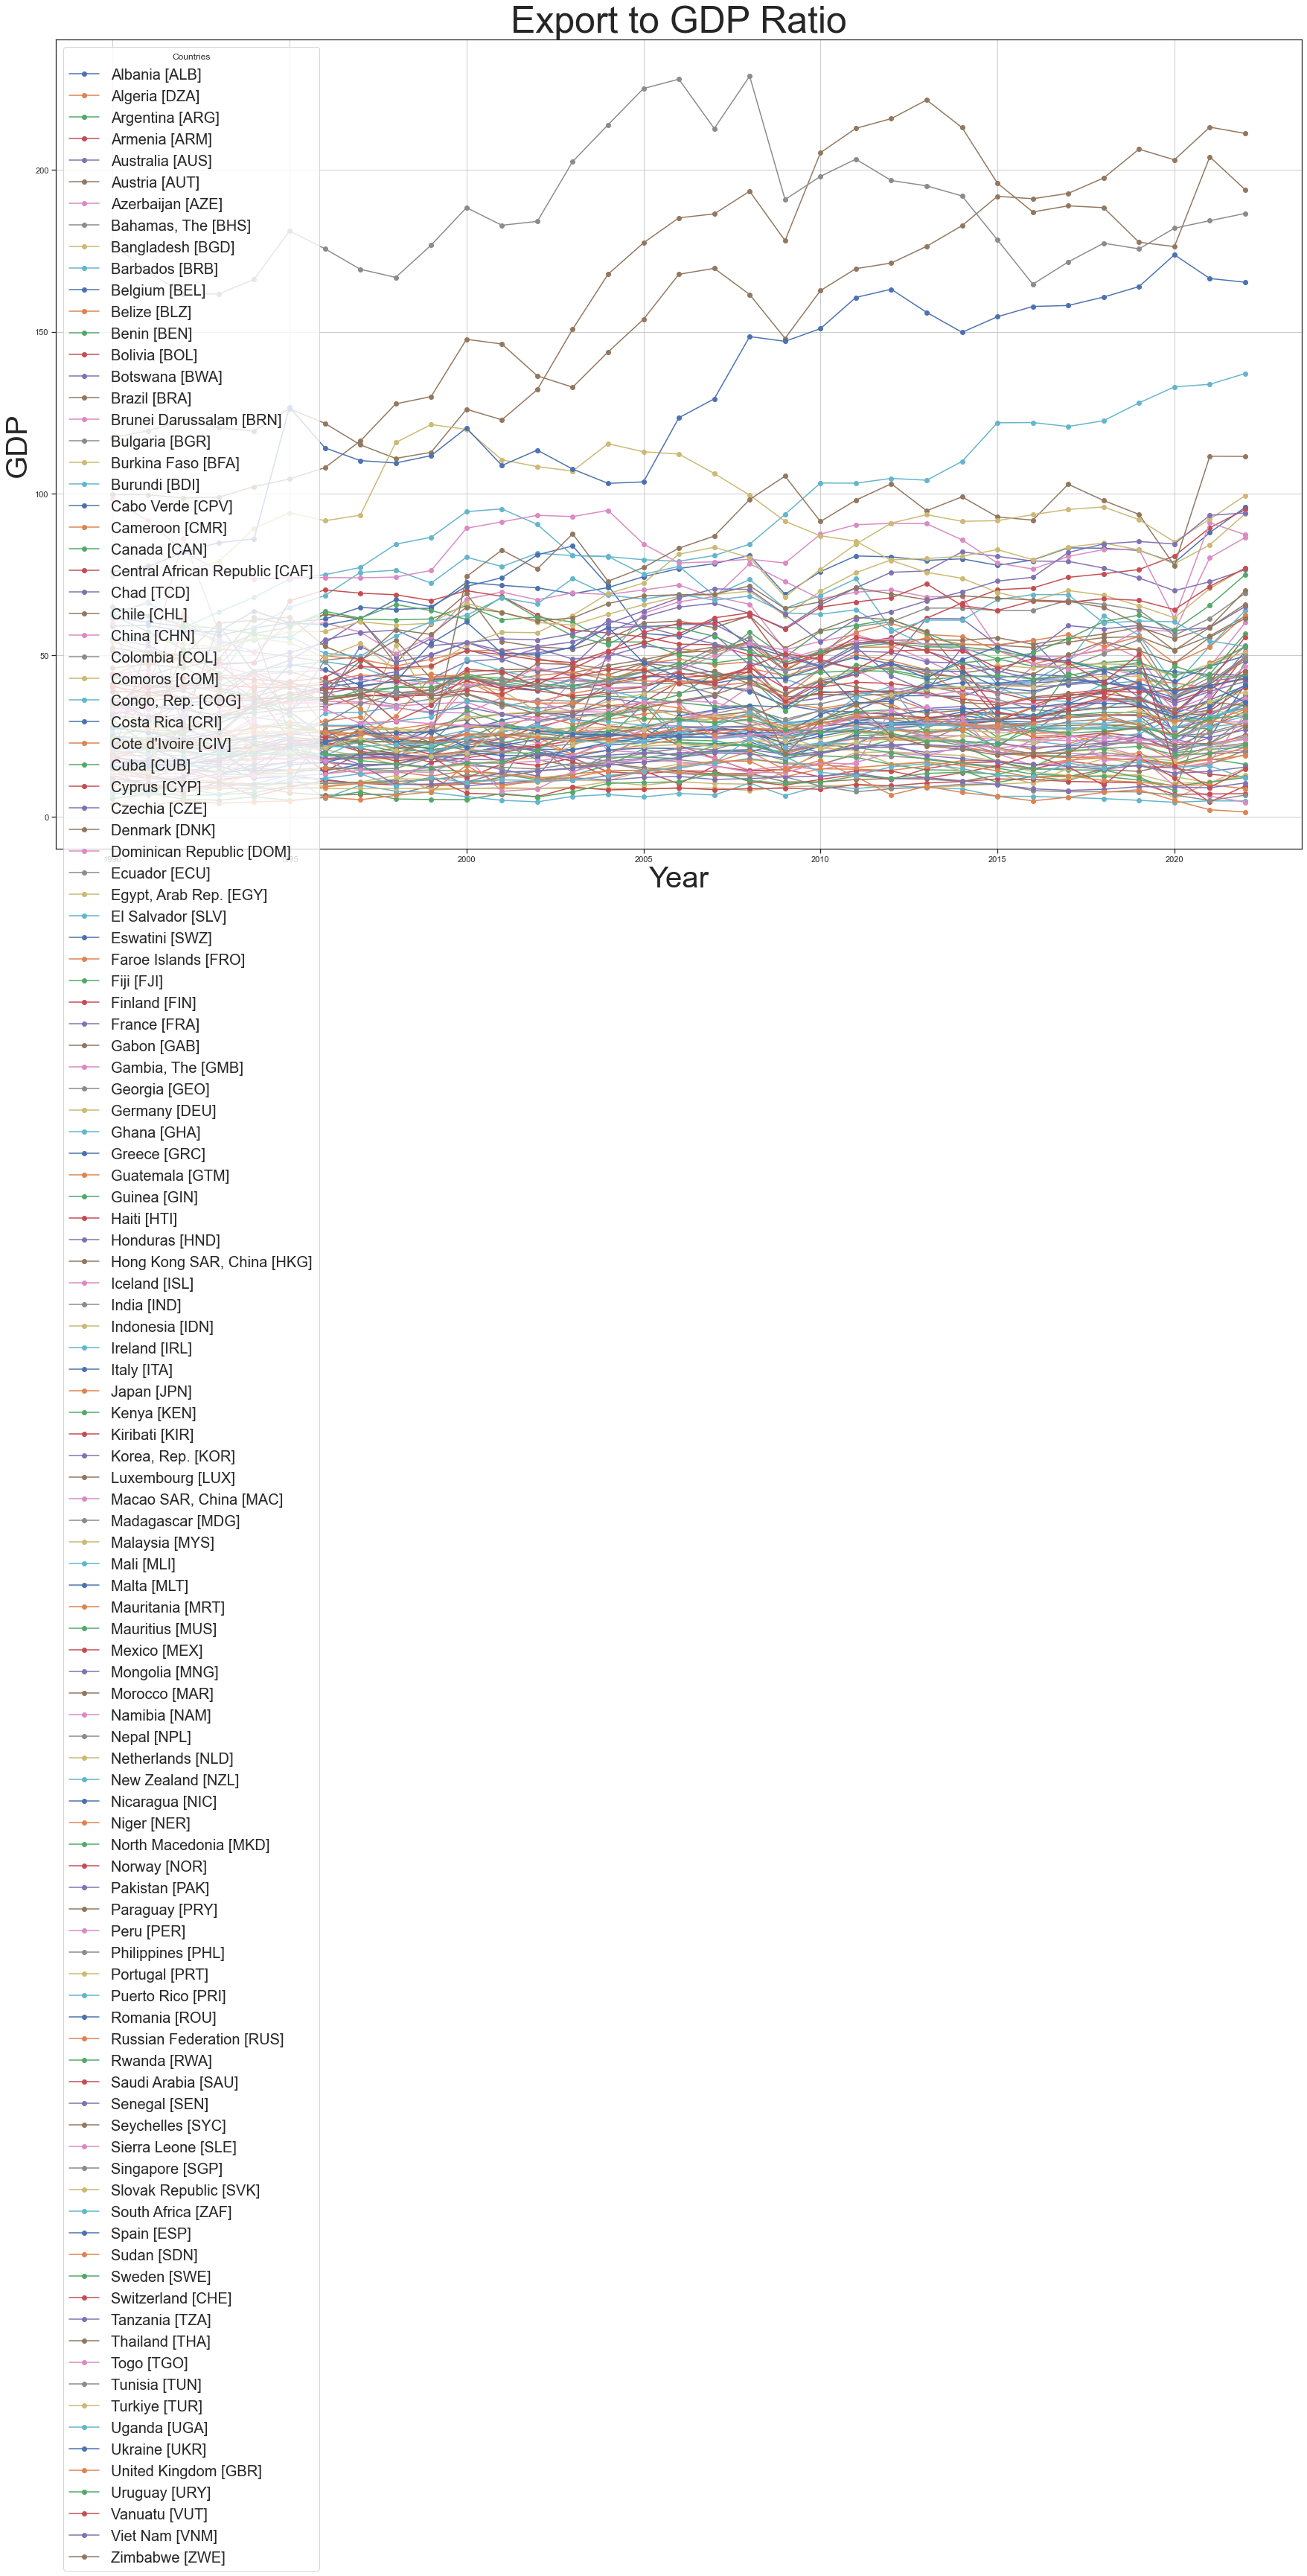

In [427]:
######################################### Some countried have Exports higher than GDP??? ################
## Yes imports are subtracted from gdp

######################################### make this into a scatter plot then fit a line to it



# Create a line plot using Matplotlib
plt.figure(figsize=(30, 20))

# Iterate over columns and plot each as a separate line
for col in e2g.columns:  # Exclude the first column ('Name') from the iteration
    plt.plot(e2g.index, e2g[col], marker='o', label=col)

# Customize the plot
plt.title('Export to GDP Ratio', fontsize=50)
plt.xlabel('Year', fontsize=40)
plt.ylabel('GDP', fontsize=40)
plt.legend(title='Countries', loc='upper left', fontsize = 20)
plt.grid(True)
plt.show()

In [471]:
col2keep = ["World [WLD]", "Sub-Saharan Africa [SSF]", "South Asia [SAS]", "Middle East & North Africa (IDA & IBRD countries) [TMN]", "Latin America & Caribbean [LCN]", "Europe & Central Asia [ECS]", "East Asia & Pacific [EAS]"]
rexper2 = rexper1[col2keep]
pd.set_option('display.max_columns', 40) # set max columns
#rexper1.corr()
              
rexper2

World [WLD]  Sub-Saharan Africa [SSF]  South Asia [SAS]  \
Year                                                            
1990    18.826593                 23.690479          8.257624   
1991    18.710515                 21.514169          9.989105   
1992    19.765534                 24.277702         10.505239   
1993    18.780879                 24.554051         11.414544   
1994    19.493055                 25.018748         11.362638   
1995    20.696881                 23.050694         12.448097   
1996    21.144373                 21.942065         11.924881   
1997    22.024983                 21.033010         12.191887   
1998    21.841195                 19.727080         12.565320   
1999    21.947490                 27.690251         12.666163   
2000    23.551510                 28.594152         13.213718   
2001    22.970011                 28.673113         13.061730   
2002    23.231563                 27.960450         14.254029   
2003    23.979308                 26.858217         14.802943   
2004    25.866917                 26.964284         16.902849   
2005    27.153725                 28.028630         18.571687   
2006    28.828521                 28.261116         20.022934   
2007    29.777734                 29.796340         19.667992   
2008    30.956106                 31.880966         22.087385   
2009    26.365334                 26.038024         19.285790   
2010    28.685405                 27.801198         20.971977   
2011    30.476624                 29.445444         22.909890   
2012    30.252460                 27.565801         22.623626   
2013    30.254416                 25.653727         23.261072   
2014    29.924471                 24.383910         21.211664   
2015    28.310662                 21.190993         18.360238   
2016    27.347160                 21.032475         17.447767   
2017    28.304015                 22.654523         17.103208   
2018    29.185115                 24.438280         17.970038   
2019    28.321044                 22.939836         17.217299   
2020    26.452326                 21.084094         16.737328   
2021    29.074225                 24.842036         19.015201   
2022    30.960082                 26.637171         20.464923   

      Middle East & North Africa (IDA & IBRD countries) [TMN]  \
Year                                                            
1990                                          18.245848         
1991                                          28.090214         
1992                                          26.829819         
1993                                          25.527445         
1994                                          27.759390         
1995                                          25.715880         
1996                                          24.977434         
1997                                          26.519692         
1998                                          23.373935         
1999                                          27.401173         
2000                                          32.078714         
2001                                          29.324540         
2002                                          32.383599         
2003                                          31.892078         
2004                                          35.493067         
2005                                          39.109589         
2006                                          39.472689         
2007                                          38.559793         
2008                                          39.297838         
2009                                          30.376300         
2010                                          31.959517         
2011                                          30.459638         
2012                                          29.968387         
2013                                          29.711800         
2014                                    

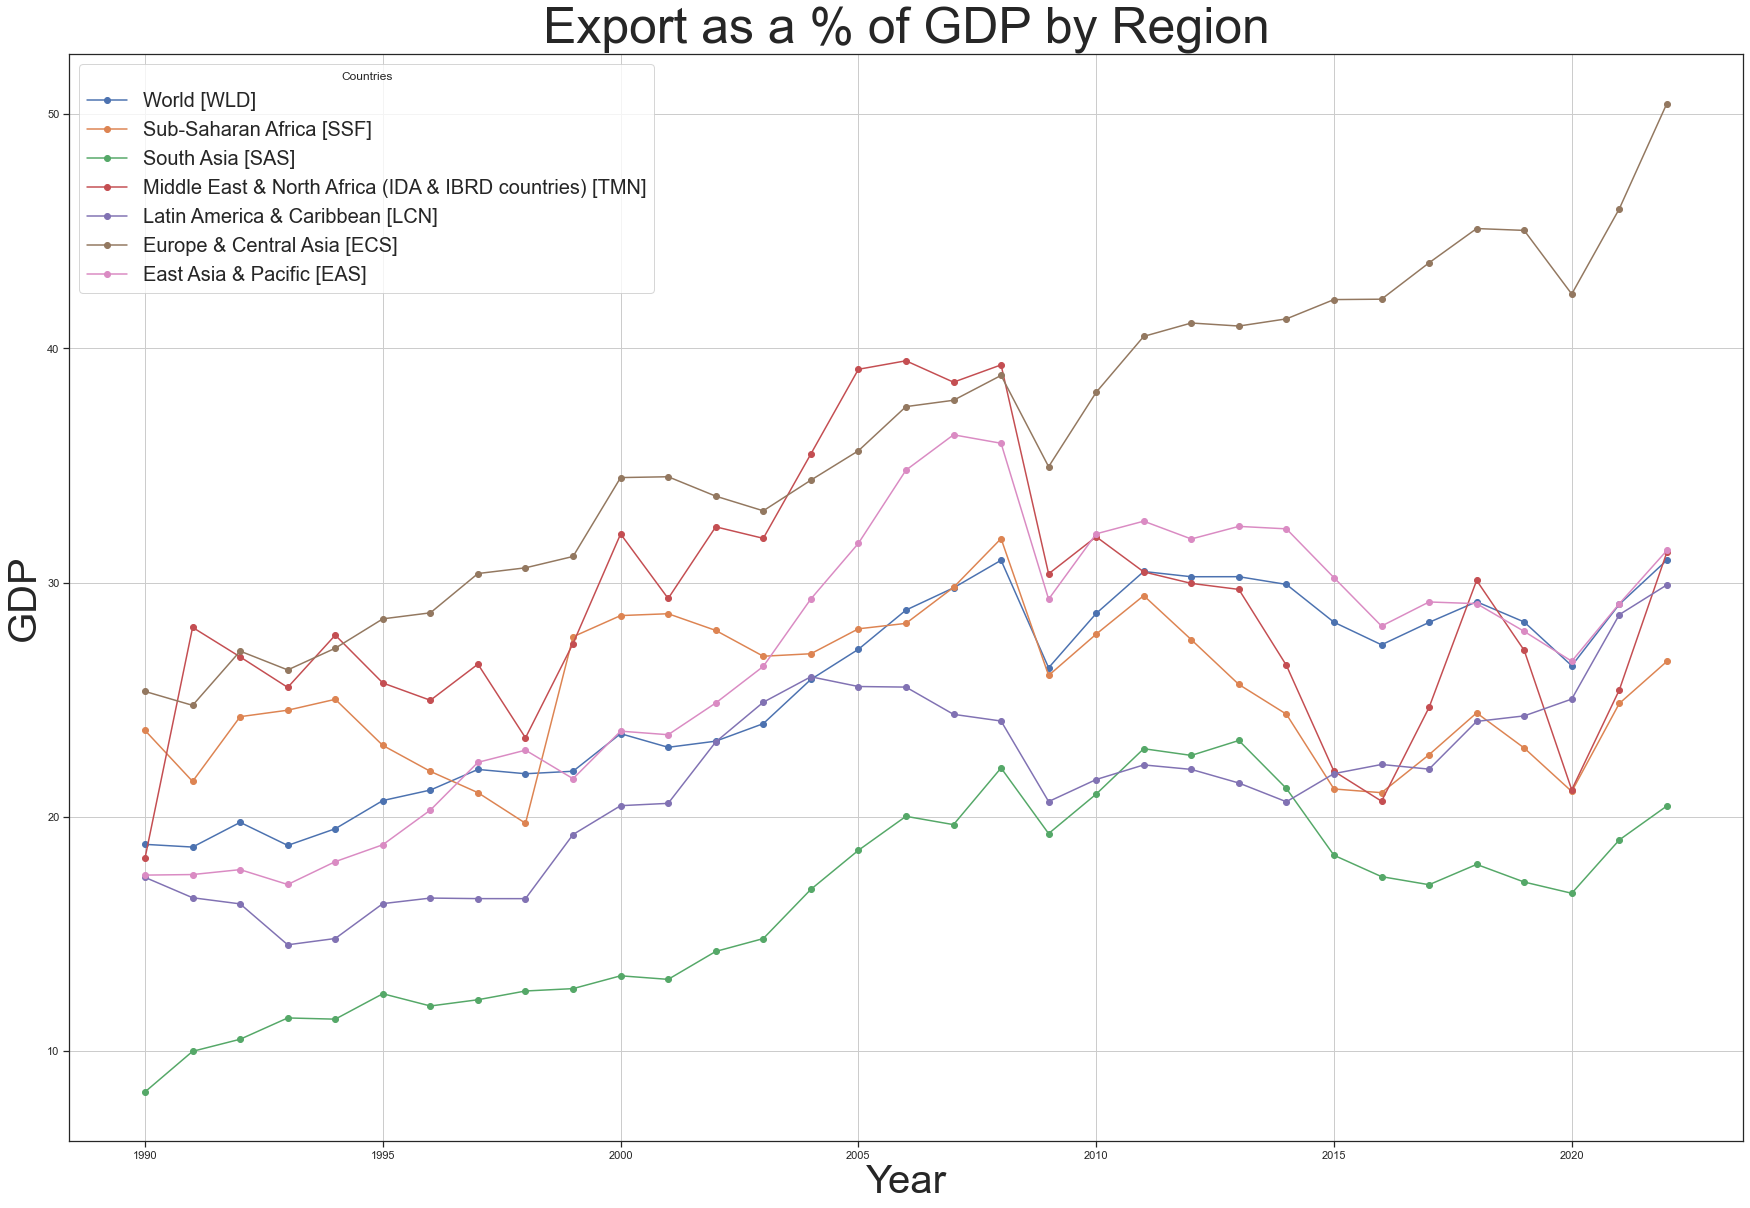

In [472]:
# World Exports as a Percentage of GDP
#Figure size
plt.figure(figsize=(30, 20))

# Plot Export to GDP Ratio
for col in rexper2.columns:
    plt.plot(rexper2.index, rexper2[col], marker='o', label=col)

# Customize the plot
plt.title('Export as a % of GDP by Region', fontsize=50)
plt.xlabel('Year', fontsize=40)
plt.ylabel('GDP', fontsize=40)
plt.legend(title='Countries', loc='upper left', fontsize = 20)
plt.grid(True)
plt.show()

In [470]:
col2keep = ["World [WLD]", "Sub-Saharan Africa [SSF]", "South Asia [SAS]", "Middle East & North Africa (IDA & IBRD countries) [TMN]", "Latin America & Caribbean [LCN]", "Europe & Central Asia [ECS]", "East Asia & Pacific [EAS]"]
rimper2 = rimper1[col2keep]
pd.set_option('display.max_columns', 40) # set max columns
#rexper1.corr()
              
rimper2

World [WLD]  Sub-Saharan Africa [SSF]  South Asia [SAS]  \
Year                                                            
1990    19.151000                 21.586147         10.966161   
1991    18.701907                 20.975288         11.293339   
1992    19.399016                 22.735163         12.474240   
1993    18.405164                 22.089380         13.337663   
1994    19.076075                 23.475232         13.035469   
1995    20.296938                 22.370555         14.899031   
1996    20.804908                 20.962524         14.612655   
1997    21.558417                 20.620904         14.757295   
1998    21.456180                 20.342269         14.939956   
1999    21.709394                 26.995256         15.341771   
2000    23.513491                 26.756418         15.286694   
2001    23.029195                 26.972184         15.072077   
2002    23.049819                 26.427109         16.011233   
2003    23.819085                 26.080008         16.341598   
2004    25.631198                 26.399838         19.590328   
2005    26.845174                 26.695329         22.635212   
2006    28.323829                 26.428823         24.806331   
2007    29.135590                 28.526743         25.039018   
2008    30.423904                 30.644125         29.070050   
2009    25.804138                 28.388488         25.855679   
2010    27.897081                 27.278936         26.472407   
2011    29.661351                 28.347675         30.169816   
2012    29.394009                 28.284525         30.262987   
2013    29.340477                 27.696541         27.693436   
2014    29.205131                 26.113394         25.626491   
2015    27.592630                 25.549555         22.243121   
2016    26.645805                 24.564257         20.622614   
2017    27.578950                 24.748681         21.611979   
2018    28.529339                 25.519333         23.453838   
2019    27.760036                 23.809694         21.443083   
2020    25.694127                 22.167453         19.050621   
2021    28.131428                 24.315729         23.236185   
2022    30.476327                 27.138078         25.930167   

      Middle East & North Africa (IDA & IBRD countries) [TMN]  \
Year                                                            
1990                                          19.066119         
1991                                          30.136423         
1992                                          29.836395         
1993                                          31.572782         
1994                                          29.269169         
1995                                          27.980204         
1996                                          26.708726         
1997                                          27.002548         
1998                                          27.305237         
1999                                          27.376548         
2000                                          27.614106         
2001                                          28.857722         
2002                                          30.206850         
2003                                          30.959103         
2004                                          34.247846         
2005                                          34.159892         
2006                                          31.494936         
2007                                          31.861069         
2008                                          33.639959         
2009                                          32.459359         
2010                                          30.081703         
2011                                          27.040552         
2012                                          29.270690         
2013                                          30.550324         
2014                                    

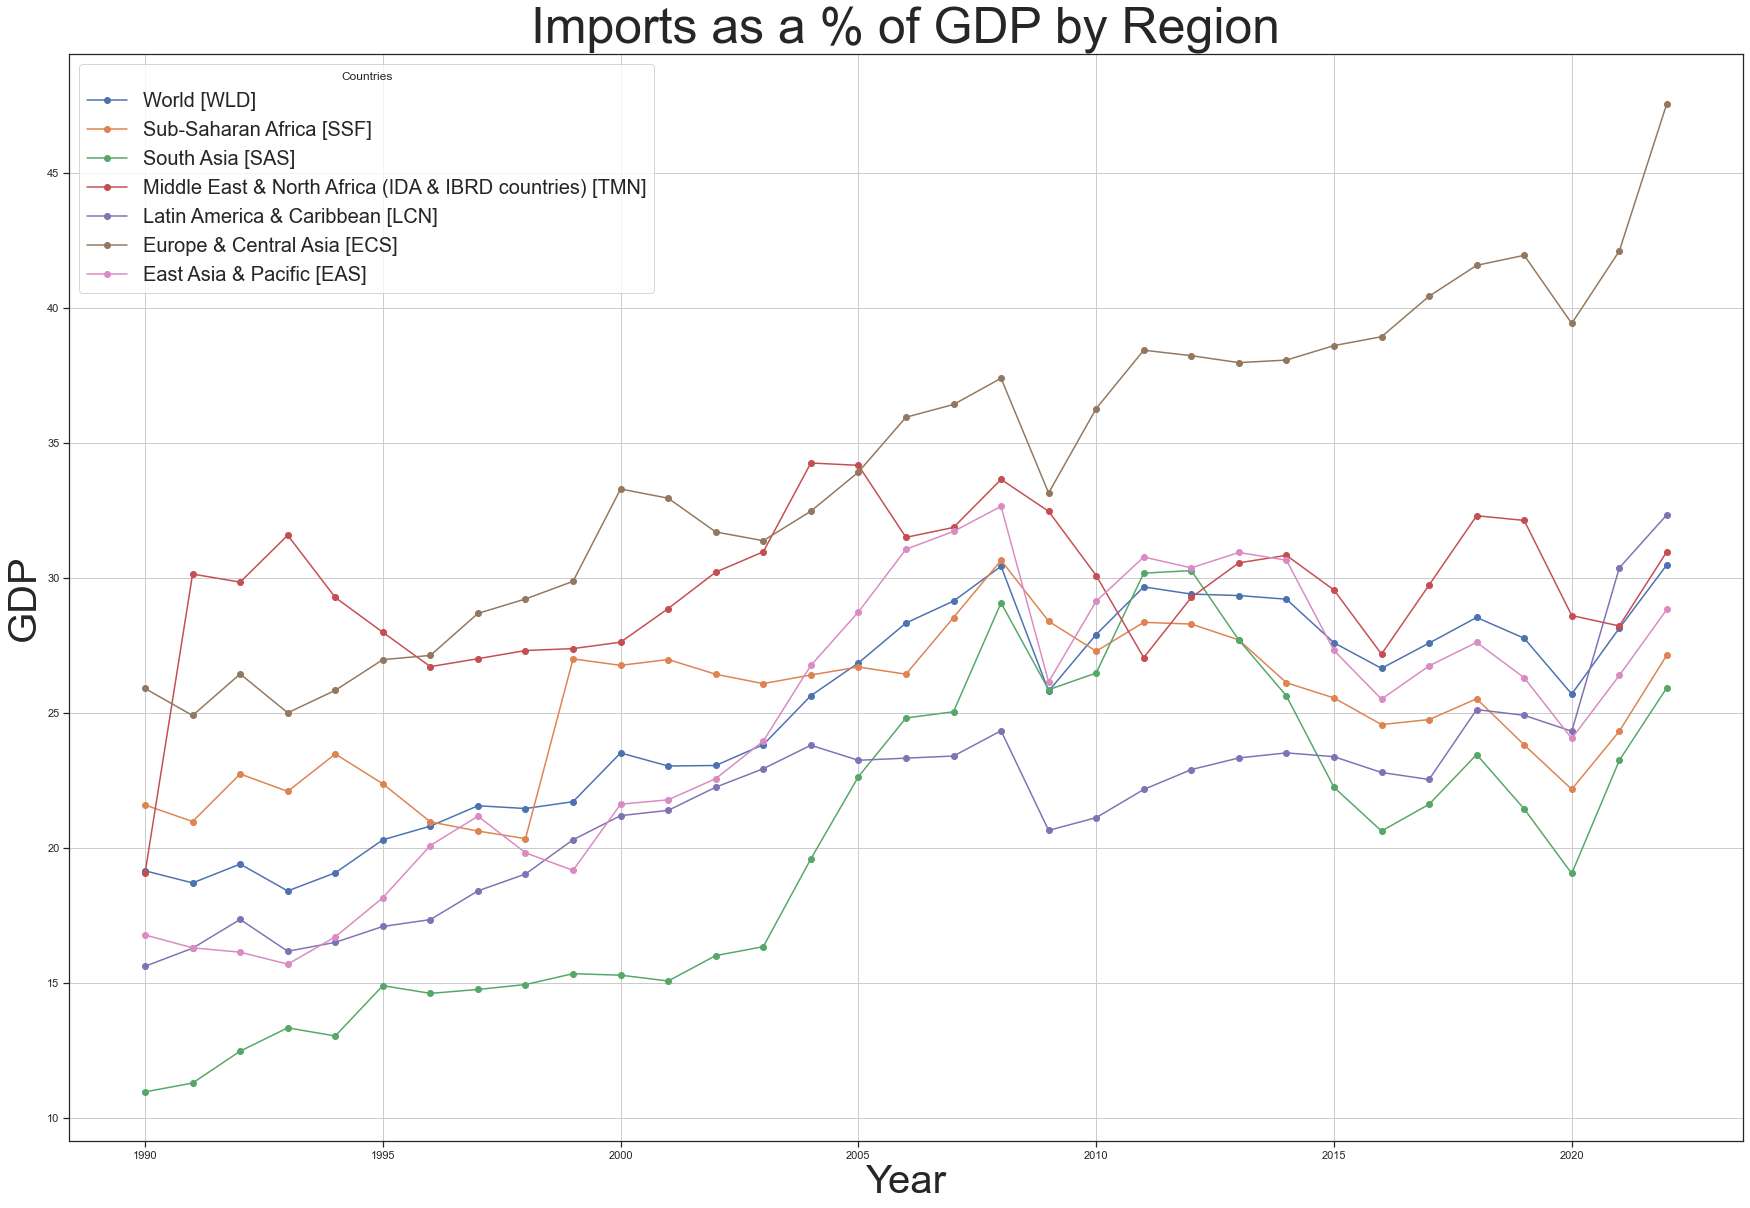

In [473]:
# World Imports as a Percentage of GDP
#Figure size
plt.figure(figsize=(30, 20))

# Plot Export to GDP Ratio
for col in rimper2.columns:
    plt.plot(rimper2.index, rimper2[col], marker='o', label=col)

# Customize the plot
plt.title('Imports as a % of GDP by Region', fontsize=50)
plt.xlabel('Year', fontsize=40)
plt.ylabel('GDP', fontsize=40)
plt.legend(title='Countries', loc='upper left', fontsize = 20)
plt.grid(True)
plt.show()

In [ ]:
# Set seaborn 
sns.set_theme(style="whitegrid")



In [183]:
# graph total world gdp


# Set style
sns.set_theme(style="ticks")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data= w1,
    x="Year", y="GDP",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

ValueError: Could not interpret value `Year` for parameter `x`

In [ ]:
# graph world trade, imp and exp

In [ ]:
# compare imports/ exports as percent of gdp

In [ ]:
# lable countries by region then place on scatter plots of 

#Imp vs. Exp 

f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
#clarity_ranking = ["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"] # this is how you add a trd dimention, could be used for region
sns.scatterplot(x="carat", y="price",
                hue="clarity", size="depth",
                palette="ch:r=-.2,d=.3_r",
                hue_order=clarity_ranking,
                sizes=(1, 8), linewidth=0,
                data=diamonds, ax=ax)

In [ ]:
# Exp as a % of GDP

In [299]:
# Import data
wex = pd.read_csv("C:\\Users\\Ian\\Desktop\\Data Analysis 12-23-23\\WtoData_World_Exp_23.csv", encoding='unicode_escape')

# Remove Doubles
wex = wex[wex['Indicator Code']=='ITS_MTV_AX']

# Only Annual 
wex = wex[wex['Frequency']=="Annual"]

# Drop Columns
wex1 = wex[['Product/Sector', 'Year', 'Value']]

# Make 'Year' a str
wex1['Year'] = wex1['Year'].astype(int)

# Present
wex1

C:\Users\Ian\AppData\Local\Temp/ipykernel_12448/3612589071.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wex1['Year'] = wex1['Year'].astype(int)


Product/Sector  Year         Value
414  Agricultural products  2000  5.498471e+05
415  Agricultural products  2001  5.513287e+05
416  Agricultural products  2002  5.831804e+05
417  Agricultural products  2003  6.816780e+05
418  Agricultural products  2004  7.811556e+05
..                     ...   ...           ...
823      Total merchandise  2018  1.955004e+07
824      Total merchandise  2019  1.901711e+07
825      Total merchandise  2020  1.765328e+07
826      Total merchandise  2021  2.236577e+07
827      Total merchandise  2022  2.492577e+07

[414 rows x 3 columns]

In [98]:
wex1['Product/Sector'].value_counts()

Agricultural products                              23
Food                                               23
Fuels                                              23
Fuels and mining products                          23
Textiles                                           23
Transport equipment                                23
Telecommunications equipment                       23
Integrated circuits and electronic components      23
Electronic data processing and office equipment    23
Office and telecom equipment                       23
Automotive products                                23
Machinery and transport equipment                  23
Iron and steel                                     23
Clothing                                           23
Pharmaceuticals                                    23
Chemicals                                          23
Manufactures                                       23
Total merchandise                                  23
Name: Product/Sector, dtype:

In [170]:
# List of cateories 
sec = ['Agricultural products', 'Food', 'Fuels','Fuels and mining products', 
       'Textiles', 'Transport equipment', 'Telecommunications equipment',
      'Integrated circuits and electronic components', 'Electronic data processing and office equipment',
      'Office and telecom equipment', 'Automotive products', 'Automotive products', 'Machinery and transport equipment',
      'Iron and steel', 'Clothing', 'Pharmaceuticals', 'Chemicals', 'Manufactures', 'Total merchandise']

sec1 = ['Agricultural products', 'Food', 'Fuels','Fuels and mining products', 
       'Textiles', 'Transport equipment', 'Telecommunications equipment',
      'Integrated circuits and electronic components', 'Electronic data processing and office equipment',
      'Office and telecom equipment', 'Automotive products', 'Automotive products', 'Machinery and transport equipment',
      'Iron and steel', 'Clothing', 'Pharmaceuticals', 'Chemicals']

In [300]:
new = pd.DataFrame()
for i in sec:
    w = wex1[wex1['Product/Sector'] == i]
    w = w.rename(columns = {"Value": i})
    w = w.drop('Product/Sector', axis=1)
    w = w.set_index('Year')
    new[i] = w

new # note all of these scientifc notation values refer to millions of US Dollars

Agricultural products          Food         Fuels  \
Year                                                      
2000           5.498471e+05  4.300427e+05  6.675614e+05   
2001           5.513287e+05  4.422318e+05  6.040839e+05   
2002           5.831804e+05  4.690576e+05  6.176176e+05   
2003           6.816780e+05  5.496009e+05  7.642643e+05   
2004           7.811556e+05  6.266016e+05  1.022553e+06   
2005           8.477152e+05  6.809364e+05  1.457315e+06   
2006           9.424501e+05  7.538360e+05  1.801129e+06   
2007           1.131691e+06  9.156529e+05  2.047440e+06   
2008           1.342823e+06  1.114698e+06  2.884170e+06   
2009           1.177136e+06  9.980036e+05  1.838528e+06   
2010           1.354429e+06  1.115790e+06  2.395065e+06   
2011           1.649389e+06  1.350316e+06  3.268505e+06   
2012           1.655099e+06  1.369778e+06  3.399965e+06   
2013           1.731531e+06  1.445339e+06  3.309479e+06   
2014           1.746687e+06  1.480252e+06  3.026072e+06   
2015           1.565686e+06  1.332886e+06  1.808811e+06   
2016           1.585693e+06  1.357202e+06  1.492255e+06   
2017           1.731381e+06  1.473948e+06  1.948478e+06   
2018           1.810271e+06  1.533561e+06  2.528513e+06   
2019           1.788200e+06  1.533159e+06  2.370333e+06   
2020           1.809475e+06  1.573538e+06  1.571511e+06   
2021           2.148665e+06  1.836335e+06  2.555970e+06   
2022           2.325521e+06  2.007666e+06  3.865877e+06   

      Fuels and mining products       Textiles  Transport equipment  \
Year                                                                  
2000               8.599689e+05  156257.467160         8.327063e+05   
2001               7.771756e+05  148140.899370         8.374535e+05   
2002               7.910530e+05  154385.234637         8.966408e+05   
2003               9.683400e+05  173066.201976         1.030753e+06   
2004               1.312479e+06  195034.304071         1.226196e+06   
2005               1.810185e+06  203112.313208         1.316261e+06   
2006               2.319402e+06  219196.144698         1.466888e+06   
2007               2.674500e+06  239937.581493         1.725185e+06   
2008               3.554158e+06  251268.793728         1.841844e+06   
2009               2.299789e+06  212161.318400         1.376294e+06   
2010               3.074398e+06  252836.046118         1.686686e+06   
2011               4.122493e+06  295144.734299         1.962777e+06   
2012               4.164125e+06  282815.973398         1.972622e+06   
2013               4.051300e+06  302423.676032         2.035313e+06   
2014               3.720251e+06  311172.678000         1.998252e+06   
2015               2.380017e+06  288226.780000         2.020157e+06   
2016               2.033684e+06  281247.800000         2.020441e+06   
2017               2.611396e+06  295431.201000         2.133624e+06   
2018               3.264056e+06  312173.685000         2.221432e+06   
2019               3.102597e+06  305435.990000         2.167016e+06   
2020               2.326889e+06  328357.888000         1.825454e+06   
2021               3.670710e+06  354221.162000         2.128513e+06   
2022               4.950975e+06  350958.568000         2.220722e+06   

      Telecommunications equipment  \
Year                                 
2000                  2.869632e+05   
2001                  2.681129e+05   
2002                  2.728824e+05   
2003                  3.084094e+05   
2004                  3.884740e+05   
2005                  4.625308e+05   
2006                  5.464720e+05   
2007                  5.585460e+05   
2008                  6.005958e+05   
2009                  5.075211e+05   
2010                  5.854481e+05   
2011                  6.393285e+05   
2012                  6.581305e+05   
2013                  6.945652e+05   
2014                  7.182055e+05   
2015                  7.057662e+05   
2016                  6.850967e+05   
2017                  6.442908e+

In [147]:
###################### Didn't Work####################
# Sci to Dec

# Custom function to format each cell
def format_decimal(value):
    return "{:.6f}".format(value)

# Apply the custom formatting function to each cell
#wex3 = new.applymap(format_decimal)

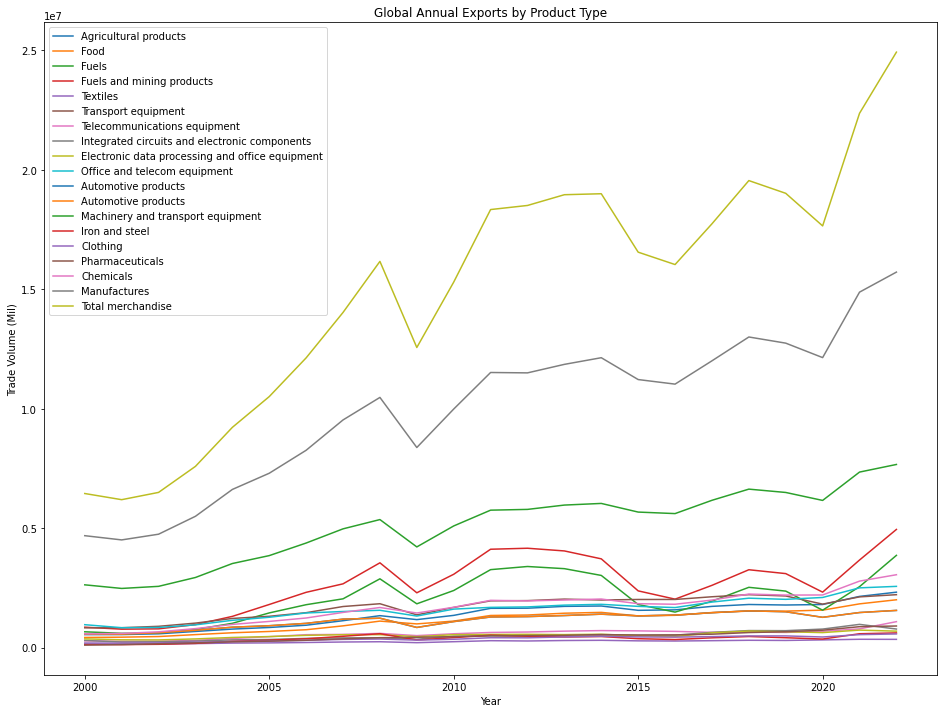

In [301]:
########################## Get more colors #####################
# Plotting


# Fig size
plt.figure(figsize=(16, 12))

#
for i in sec:
    plt.plot(new.index, new[i], label = i)
    #plt.legend(i) 
    
    
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Trade Volume (Mil)')
plt.title('Global Annual Exports by Product Type')

# Adding legend
plt.legend()
plt.show() # It appears that the total is compressing the rest of the values

In [302]:
new1 = new.drop(["Total merchandise", "Manufactures"], axis = 1)
new1.head()

Agricultural products           Food         Fuels  \
Year                                                       
2000          549847.125552  430042.692300  6.675614e+05   
2001          551328.724028  442231.808464  6.040839e+05   
2002          583180.360191  469057.593192  6.176176e+05   
2003          681677.966985  549600.851609  7.642643e+05   
2004          781155.570713  626601.602168  1.022553e+06   

      Fuels and mining products       Textiles  Transport equipment  \
Year                                                                  
2000               8.599689e+05  156257.467160         8.327063e+05   
2001               7.771756e+05  148140.899370         8.374535e+05   
2002               7.910530e+05  154385.234637         8.966408e+05   
2003               9.683400e+05  173066.201976         1.030753e+06   
2004               1.312479e+06  195034.304071         1.226196e+06   

      Telecommunications equipment  \
Year                                 
2000                 286963.210851   
2001                 268112.934317   
2002                 272882.438684   
2003                 308409.374923   
2004                 388474.021221   

      Integrated circuits and electronic components  \
Year                                                  
2000                                  306703.220079   
2001                                  238979.937242   
2002                                  248573.739710   
2003                                  278998.027258   
2004                                  329651.914736   

      Electronic data processing and office equipment  \
Year                                                    
2000                                    371277.340474   
2001                                    331933.292497   
2002                                    327799.009602   
2003                                    369768.482942   
2004                                    430040.388915   

      Office and telecom equipment  Automotive products  \
Year                                                      
2000                  9.649438e+05        576724.524000   
2001                  8.390262e+05        569453.507910   
2002                  8.492552e+05        628276.712339   
2003                  9.571759e+05        730014.047275   
2004                  1.148166e+06        859882.191899   

      Machinery and transport equipment  Iron and steel       Clothing  \
Year                                                                     
2000                       2.633056e+06   141563.425716  197723.360327   
2001                       2.481923e+06   131146.805121  194363.802970   
2002                       2.569425e+06   143951.459206  203725.878841   
2003                       2.940480e+06   182082.937945  233280.943637   
2004                       3.524638e+06   269381.652429  260436.268785   

      Pharmaceuticals      Chemicals  
Year                                  
2000    108580.056911  584300.844878  
2001    132552.134211  598611.081450  
2002    166778.447679  666321.591946  
2003    204983.253321  800741.233973  
2004    247816.261518  975966.193720

In [303]:
# Getting CPI Percent Change at Annual Rate
cpi = pd.read_csv("C:\\Users\\Ian\\Desktop\\Data Analysis 12-23-23\\CPI Percent Change at Annual Rate.csv")

# Rename CPI Column
cpi = cpi.rename(columns = { 'MEDCPIM158SFRBCLE': 'CPI Percent Change'})

# Reformat DATE Column Data
#type(cpi['DATE'])
cpi['DATE'] = cpi['DATE'].astype(str).str[:-6]
cpi

DATE  CPI Percent Change
0   2000            3.029770
1   2001            3.266541
2   2002            2.591918
3   2003            1.680593
4   2004            2.432897
5   2005            2.763462
6   2006            3.133005
7   2007            3.058301
8   2008            2.712012
9   2009            1.266599
10  2010            0.726424
11  2011            2.313895
12  2012            2.147853
13  2013            2.132375
14  2014            2.237398
15  2015            2.309275
16  2016            2.576986
17  2017            2.439580
18  2018            2.722906
19  2019            2.898073
20  2020            2.257356
21  2021            4.010184
22  2022            6.992915

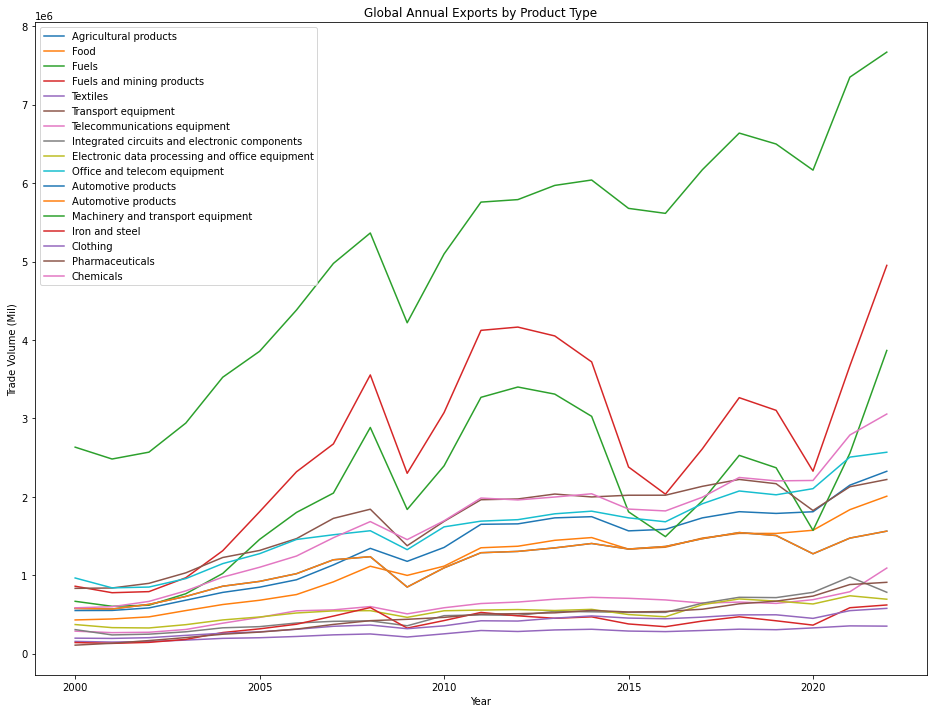

In [171]:
# Plotting


# Fig size
plt.figure(figsize=(16, 12))

#
for i in sec1:
    plt.plot(new1.index, new1[i], label = i)
    #plt.legend(i) 
    
    
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Trade Volume (Mil)')b
plt.title('Global Annual Exports by Product Type')

# Adding legend
plt.legend()
plt.show() 

- Add percentages for each sector in the ledgend. 
- Could drop in 2016 be Trump trade war related? (NAFTA 2)
- Dip in oil exports prior to covid, could this be a result of raising rates? Compare with Fed funds rate.
- Compare this to total world debt: federal, municipal, private.
- Can you get data by month? Detailed data by months, effect of black sea at war and red sea to war, compare to dates.
- Change in trade relations between NATO and Eurasia, friendshoring, who is trading more with who?

In [304]:
# Rename
cpi1 = cpi.rename(columns = {'DATE' : 'Year'})

# Setting Index
cpi1 = cpi1.set_index('Year')


cpi1

CPI Percent Change
Year                    
2000            3.029770
2001            3.266541
2002            2.591918
2003            1.680593
2004            2.432897
2005            2.763462
2006            3.133005
2007            3.058301
2008            2.712012
2009            1.266599
2010            0.726424
2011            2.313895
2012            2.147853
2013            2.132375
2014            2.237398
2015            2.309275
2016            2.576986
2017            2.439580
2018            2.722906
2019            2.898073
2020            2.257356
2021            4.010184
2022            6.992915

In [275]:
####################### Why isn't this joining on the index??? ##################################

# New DF
# new2 = pd.merge(cpi1, new1, left_index=True, right_index=True) # Not working

# Reset index
#cpi1.reset_index(drop=True, inplace=True)
#new1.reset_index(drop=True, inplace=True)

# Try again
#new2 = pd.merge(cpi1, new1,  left_index=True, right_index=True)
                

#new2

CPI Percent Change  Agricultural products          Food         Fuels  \
0             3.029770           5.498471e+05  4.300427e+05  6.675614e+05   
1             3.266541           5.513287e+05  4.422318e+05  6.040839e+05   
2             2.591918           5.831804e+05  4.690576e+05  6.176176e+05   
3             1.680593           6.816780e+05  5.496009e+05  7.642643e+05   
4             2.432897           7.811556e+05  6.266016e+05  1.022553e+06   
5             2.763462           8.477152e+05  6.809364e+05  1.457315e+06   
6             3.133005           9.424501e+05  7.538360e+05  1.801129e+06   
7             3.058301           1.131691e+06  9.156529e+05  2.047440e+06   
8             2.712012           1.342823e+06  1.114698e+06  2.884170e+06   
9             1.266599           1.177136e+06  9.980036e+05  1.838528e+06   
10            0.726424           1.354429e+06  1.115790e+06  2.395065e+06   
11            2.313895           1.649389e+06  1.350316e+06  3.268505e+06   
12            2.147853           1.655099e+06  1.369778e+06  3.399965e+06   
13            2.132375           1.731531e+06  1.445339e+06  3.309479e+06   
14            2.237398           1.746687e+06  1.480252e+06  3.026072e+06   
15            2.309275           1.565686e+06  1.332886e+06  1.808811e+06   
16            2.576986           1.585693e+06  1.357202e+06  1.492255e+06   
17            2.439580           1.731381e+06  1.473948e+06  1.948478e+06   
18            2.722906           1.810271e+06  1.533561e+06  2.528513e+06   
19            2.898073           1.788200e+06  1.533159e+06  2.370333e+06   
20            2.257356           1.809475e+06  1.573538e+06  1.571511e+06   
21            4.010184           2.148665e+06  1.836335e+06  2.555970e+06   
22            6.992915           2.325521e+06  2.007666e+06  3.865877e+06   

    Fuels and mining products       Textiles  Transport equipment  \
0                8.599689e+05  156257.467160         8.327063e+05   
1                7.771756e+05  148140.899370         8.374535e+05   
2                7.910530e+05  154385.234637         8.966408e+05   
3                9.683400e+05  173066.201976         1.030753e+06   
4                1.312479e+06  195034.304071         1.226196e+06   
5                1.810185e+06  203112.313208         1.316261e+06   
6                2.319402e+06  219196.144698         1.466888e+06   
7                2.674500e+06  239937.581493         1.725185e+06   
8                3.554158e+06  251268.793728         1.841844e+06   
9                2.299789e+06  212161.318400         1.376294e+06   
10               3.074398e+06  252836.046118         1.686686e+06   
11               4.122493e+06  295144.734299         1.962777e+06   
12               4.164125e+06  282815.973398         1.972622e+06   
13               4.051300e+06  302423.676032         2.035313e+06   
14               3.720251e+06  311172.678000         1.998252e+06   
15               2.380017e+06  288226.780000         2.020157e+06   
16               2.033684e+06  281247.800000         2.020441e+06   
17               2.611396e+06  295431.201000         2.133624e+06   
18               3.264056e+06  312173.685000         2.221432e+06   
19               3.102597e+06  305435.990000         2.167016e+06   
20               2.326889e+06  328357.888000         1.825454e+06   
21               3.670710e+06  354221.162000         2.128513e+06   
22               4.950975e+06  350958.568000         2.220722e+06   

    Telecommunications equipment  \
0                   2.869632e+05   
1                   2.681129e+05   
2                   2.728824e+05   
3                   3.084094e+05   
4                   3.884740e+05   
5                   4.625308e+05   
6                   5.464720e+05   
7                   5.585460e+05   
8                   6.005958e+05   
9                   5.075211e+05   
10                  5.854481e+05   
11                  6.393285e+05   
12                  6.581305e+

In [329]:
# Get Gross World Product
wgdp = pd.read_csv('C:\\Users\\Ian\\Desktop\\Data Analysis 12-23-23\\World GDP (Current US$, abridged).csv')
wgdp

# Select years 2000-2022
wgdp1 = wgdp.iloc[:,-23:]

# Global totals
wgdp1.loc["GWP"] = wgdp1.sum()
wgdp2 = wgdp1.tail(1) # Totals

# Transposing
wgdp2 = wgdp2.transpose()
wgdp2

GWP
2000  7.581226e+13
2001  7.556538e+13
2002  7.895755e+13
2003  8.954205e+13
2004  1.012783e+14
2005  1.093966e+14
2006  1.185369e+14
2007  1.342217e+14
2008  1.479070e+14
2009  1.393149e+14
2010  1.510559e+14
2011  1.672294e+14
2012  1.693958e+14
2013  1.744406e+14
2014  1.791805e+14
2015  1.671916e+14
2016  1.698714e+14
2017  1.809613e+14
2018  1.926046e+14
2019  1.948155e+14
2020  1.891550e+14
2021  2.161188e+14
2022  2.234164e+14

In [330]:
# Diagnosing why it won't merge


#new1.index.dtype #dtype('int64')
df.index.dtype #dtype('O')

dtype('int64')

In [331]:
# Merging 
df = pd.merge(wgdp2, cpi1, left_index=True, right_index=True, how='inner')

# Fixing df index value type 
df.index = df.index.astype(int)
# Merge
df = pd.merge(df, new1, left_index=True, right_index=True, how='inner')
df


GWP  CPI Percent Change  Agricultural products          Food  \
2000  7.581226e+13            3.029770           5.498471e+05  4.300427e+05   
2001  7.556538e+13            3.266541           5.513287e+05  4.422318e+05   
2002  7.895755e+13            2.591918           5.831804e+05  4.690576e+05   
2003  8.954205e+13            1.680593           6.816780e+05  5.496009e+05   
2004  1.012783e+14            2.432897           7.811556e+05  6.266016e+05   
2005  1.093966e+14            2.763462           8.477152e+05  6.809364e+05   
2006  1.185369e+14            3.133005           9.424501e+05  7.538360e+05   
2007  1.342217e+14            3.058301           1.131691e+06  9.156529e+05   
2008  1.479070e+14            2.712012           1.342823e+06  1.114698e+06   
2009  1.393149e+14            1.266599           1.177136e+06  9.980036e+05   
2010  1.510559e+14            0.726424           1.354429e+06  1.115790e+06   
2011  1.672294e+14            2.313895           1.649389e+06  1.350316e+06   
2012  1.693958e+14            2.147853           1.655099e+06  1.369778e+06   
2013  1.744406e+14            2.132375           1.731531e+06  1.445339e+06   
2014  1.791805e+14            2.237398           1.746687e+06  1.480252e+06   
2015  1.671916e+14            2.309275           1.565686e+06  1.332886e+06   
2016  1.698714e+14            2.576986           1.585693e+06  1.357202e+06   
2017  1.809613e+14            2.439580           1.731381e+06  1.473948e+06   
2018  1.926046e+14            2.722906           1.810271e+06  1.533561e+06   
2019  1.948155e+14            2.898073           1.788200e+06  1.533159e+06   
2020  1.891550e+14            2.257356           1.809475e+06  1.573538e+06   
2021  2.161188e+14            4.010184           2.148665e+06  1.836335e+06   
2022  2.234164e+14            6.992915           2.325521e+06  2.007666e+06   

             Fuels  Fuels and mining products       Textiles  \
2000  6.675614e+05               8.599689e+05  156257.467160   
2001  6.040839e+05               7.771756e+05  148140.899370   
2002  6.176176e+05               7.910530e+05  154385.234637   
2003  7.642643e+05               9.683400e+05  173066.201976   
2004  1.022553e+06               1.312479e+06  195034.304071   
2005  1.457315e+06               1.810185e+06  203112.313208   
2006  1.801129e+06               2.319402e+06  219196.144698   
2007  2.047440e+06               2.674500e+06  239937.581493   
2008  2.884170e+06               3.554158e+06  251268.793728   
2009  1.838528e+06               2.299789e+06  212161.318400   
2010  2.395065e+06               3.074398e+06  252836.046118   
2011  3.268505e+06               4.122493e+06  295144.734299   
2012  3.399965e+06               4.164125e+06  282815.973398   
2013  3.309479e+06               4.051300e+06  302423.676032   
2014  3.026072e+06               3.720251e+06  311172.678000   
2015  1.808811e+06               2.380017e+06  288226.780000   
2016  1.492255e+06               2.033684e+06  281247.800000   
2017  1.948478e+06               2.611396e+06  295431.201000   
2018  2.528513e+06               3.264056e+06  312173.685000   
2019  2.370333e+06               3.102597e+06  305435.990000   
2020  1.571511e+06               2.326889e+06  328357.888000   
2021  2.555970e+06               3.670710e+06  354221.162000   
2022  3.865877e+06               4.950975e+06  350958.568000   

      Transport equipment  Telecommunications equipment  \
2000         8.327063e+05                  2.869632e+05   
2001         8.374535e+05                  2.681129e+05   
2002         8.966408e+05                  2.728824e+05   
2003         1.030753e+06                  3.084094e+05   
2004         1.226196e+06                  3.884740e+05   
2005         1.316261e+06                  4.625308e+05   
2006         1.466888e+06                  5.464720e+05   
2007         1.725185e+06                  5.585460e+05   
2008         1.841844e+06                  6.00595

In [332]:
df['Exp%'] = (new['Total merchandise']/df['GWP'])*100
df

GWP  CPI Percent Change  Agricultural products          Food  \
2000  7.581226e+13            3.029770           5.498471e+05  4.300427e+05   
2001  7.556538e+13            3.266541           5.513287e+05  4.422318e+05   
2002  7.895755e+13            2.591918           5.831804e+05  4.690576e+05   
2003  8.954205e+13            1.680593           6.816780e+05  5.496009e+05   
2004  1.012783e+14            2.432897           7.811556e+05  6.266016e+05   
2005  1.093966e+14            2.763462           8.477152e+05  6.809364e+05   
2006  1.185369e+14            3.133005           9.424501e+05  7.538360e+05   
2007  1.342217e+14            3.058301           1.131691e+06  9.156529e+05   
2008  1.479070e+14            2.712012           1.342823e+06  1.114698e+06   
2009  1.393149e+14            1.266599           1.177136e+06  9.980036e+05   
2010  1.510559e+14            0.726424           1.354429e+06  1.115790e+06   
2011  1.672294e+14            2.313895           1.649389e+06  1.350316e+06   
2012  1.693958e+14            2.147853           1.655099e+06  1.369778e+06   
2013  1.744406e+14            2.132375           1.731531e+06  1.445339e+06   
2014  1.791805e+14            2.237398           1.746687e+06  1.480252e+06   
2015  1.671916e+14            2.309275           1.565686e+06  1.332886e+06   
2016  1.698714e+14            2.576986           1.585693e+06  1.357202e+06   
2017  1.809613e+14            2.439580           1.731381e+06  1.473948e+06   
2018  1.926046e+14            2.722906           1.810271e+06  1.533561e+06   
2019  1.948155e+14            2.898073           1.788200e+06  1.533159e+06   
2020  1.891550e+14            2.257356           1.809475e+06  1.573538e+06   
2021  2.161188e+14            4.010184           2.148665e+06  1.836335e+06   
2022  2.234164e+14            6.992915           2.325521e+06  2.007666e+06   

             Fuels  Fuels and mining products       Textiles  \
2000  6.675614e+05               8.599689e+05  156257.467160   
2001  6.040839e+05               7.771756e+05  148140.899370   
2002  6.176176e+05               7.910530e+05  154385.234637   
2003  7.642643e+05               9.683400e+05  173066.201976   
2004  1.022553e+06               1.312479e+06  195034.304071   
2005  1.457315e+06               1.810185e+06  203112.313208   
2006  1.801129e+06               2.319402e+06  219196.144698   
2007  2.047440e+06               2.674500e+06  239937.581493   
2008  2.884170e+06               3.554158e+06  251268.793728   
2009  1.838528e+06               2.299789e+06  212161.318400   
2010  2.395065e+06               3.074398e+06  252836.046118   
2011  3.268505e+06               4.122493e+06  295144.734299   
2012  3.399965e+06               4.164125e+06  282815.973398   
2013  3.309479e+06               4.051300e+06  302423.676032   
2014  3.026072e+06               3.720251e+06  311172.678000   
2015  1.808811e+06               2.380017e+06  288226.780000   
2016  1.492255e+06               2.033684e+06  281247.800000   
2017  1.948478e+06               2.611396e+06  295431.201000   
2018  2.528513e+06               3.264056e+06  312173.685000   
2019  2.370333e+06               3.102597e+06  305435.990000   
2020  1.571511e+06               2.326889e+06  328357.888000   
2021  2.555970e+06               3.670710e+06  354221.162000   
2022  3.865877e+06               4.950975e+06  350958.568000   

      Transport equipment  Telecommunications equipment  \
2000         8.327063e+05                  2.869632e+05   
2001         8.374535e+05                  2.681129e+05   
2002         8.966408e+05                  2.728824e+05   
2003         1.030753e+06                  3.084094e+05   
2004         1.226196e+06                  3.884740e+05   
2005         1.316261e+06                  4.625308e+05   
2006         1.466888e+06                  5.464720e+05   
2007         1.725185e+06                  5.585460e+05   
2008         1.841844e+06                  6.00595

No handles with labels found to put in legend.


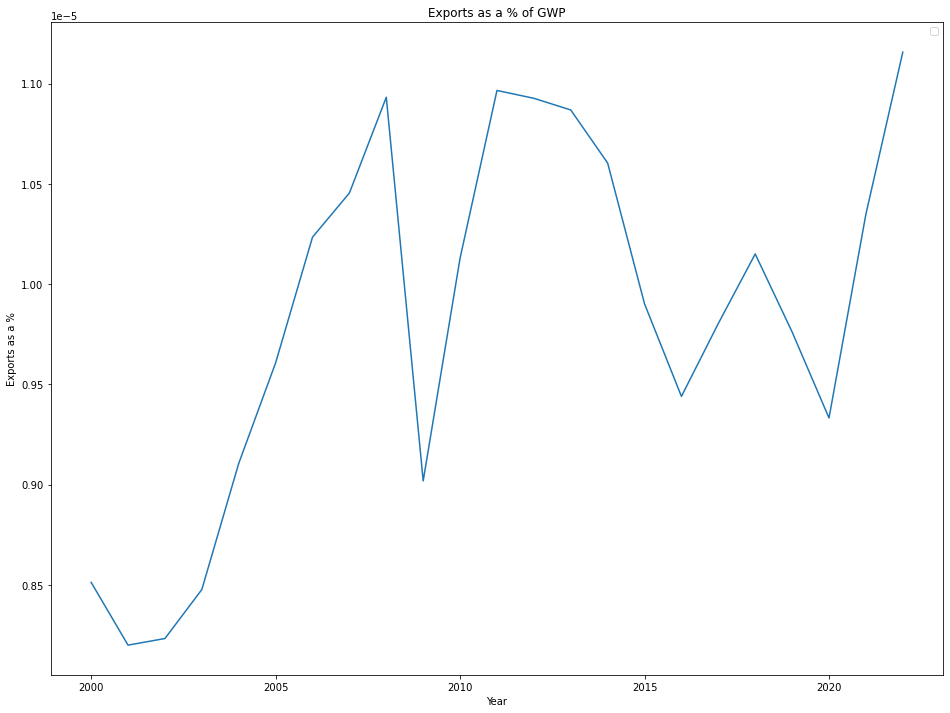

In [333]:
############################ There are still redundant values in the column for GWP, 
############################ the percentages are probably about twice as much
# Plotting


# Fig size
plt.figure(figsize=(16, 12))

#

plt.plot(df.index, df['Exp%']) 
    
    
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Exports as a %')
plt.title('Exports as a % of GWP')

# Adding legend
plt.legend()
plt.show() 

- May not have data post Russian invasion 
- Correlation with recessions 
- Cyplicaly adjusted PE
- Ten year moving average 
- Do a regression analysis, 20 year vs 2 ten year
- Energy consumption by type vs GWP, vs Total Energy consumption, broken down by region
- Check Zeihan's points one by one, each one could be a papper
    - Make List of insights
- Why is Zeihan less bullish on China Taiwan War?
- Export by tonage

No handles with labels found to put in legend.


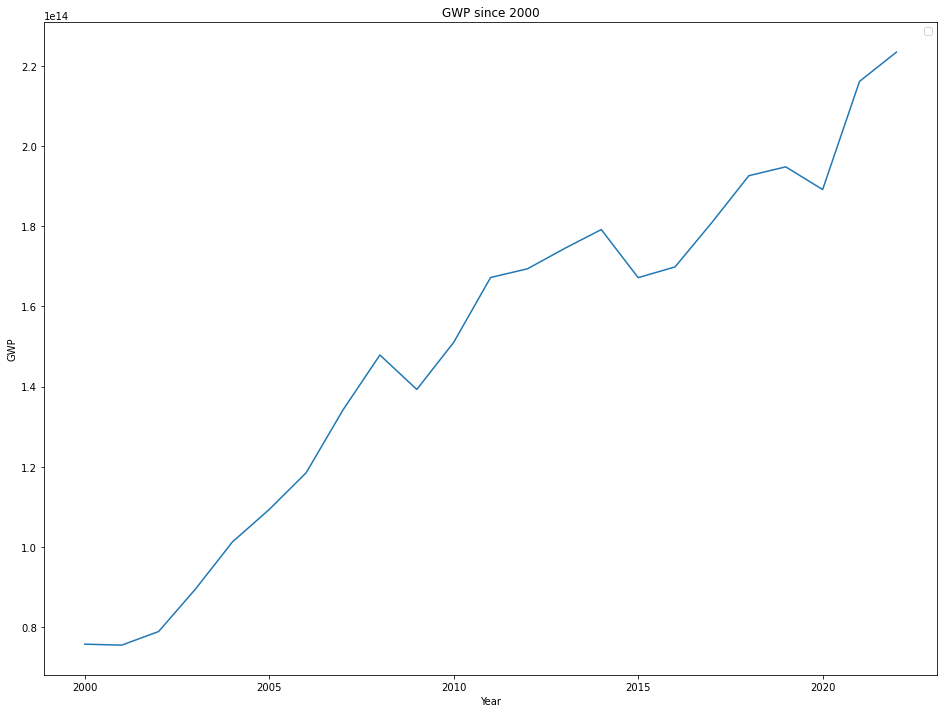

In [334]:
# Plotting


# Fig size
plt.figure(figsize=(16, 12))

#

plt.plot(df.index, df['GWP']) 
    
    
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('GWP')
plt.title('GWP since 2000')

# Adding legend
plt.legend()
plt.show() 

- Is this an S-curve?
- Compare to demographic growth
- Is dedolarization happening?
- Can you use gold as a measure? 

In [328]:
wgdp1

2000          2001          2002          2003          2004  \
0    1.873453e+09  1.896457e+09  1.961844e+09  2.044112e+09  2.254831e+09   
1    2.854040e+11  2.602190e+11  2.671420e+11  3.549070e+11  4.413600e+11   
2             NaN           NaN  3.825701e+09  4.520947e+09  5.224897e+09   
3    1.401330e+11  1.475250e+11  1.765890e+11  2.044550e+11  2.534540e+11   
4    9.129595e+09  8.936079e+09  1.528559e+10  1.781270e+10  2.355206e+10   
..            ...           ...           ...           ...           ...   
262  9.679317e+09  9.852991e+09  1.069343e+10  1.177753e+10  1.386763e+10   
263  1.517530e+11  1.354300e+11  1.290880e+11  1.970190e+11  2.558070e+11   
264  3.600632e+09  4.094441e+09  4.193850e+09  4.901870e+09  6.221110e+09   
265  6.689958e+09  6.777385e+09  6.342116e+09  5.727592e+09  5.805598e+09   
GWP  2.500492e+14  2.494050e+14  2.593646e+14  2.926056e+14  3.326046e+14   

             2005          2006          2007          2008          2009  \
0    2.360017e+09  2.469783e+09  2.677641e+09  2.843025e+09  2.553793e+09   
1    5.149270e+11  5.786330e+11  6.640990e+11  7.118000e+11  7.235130e+11   
2    6.203256e+09  6.971758e+09  9.747886e+09  1.010930e+10  1.241615e+10   
3    3.100710e+11  3.960770e+11  4.656270e+11  5.678530e+11  5.084930e+11   
4    3.697090e+10  5.238103e+10  6.526642e+10  8.853866e+10  7.030720e+10   
..            ...           ...           ...           ...           ...   
262  1.673157e+10  1.906314e+10  2.165053e+10  2.691086e+10  2.513028e+10   
263  2.888670e+11  3.038590e+11  3.330770e+11  3.161310e+11  3.297540e+11   
264  8.331870e+09  1.275686e+10  1.405696e+10  1.791086e+10  1.532834e+10   
265  5.755215e+09  5.443896e+09  5.291950e+09  4.415703e+09  9.665793e+09   
GWP  3.643576e+14  4.001531e+14  4.585494e+14  5.123402e+14  4.861534e+14   

     ...          2013          2014          2015          2016  \
0    ...  2.727850e+09  2.790850e+09  2.962907e+09  2.983635e+09   
1    ...  9.863430e+11  1.006990e+12  9.325130e+11  8.900510e+11   
2    ...  2.014642e+10  2.049713e+10  1.913422e+10  1.811657e+10   
3    ...  8.340970e+11  8.945050e+11  7.692630e+11  6.921150e+11   
4    ...  1.323390e+11  1.359670e+11  9.049642e+10  5.276162e+10   
..   ...           ...           ...           ...           ...   
262  ...  4.041523e+10  4.322859e+10  4.244449e+10  3.131782e+10   
263  ...  4.008860e+11  3.811990e+11  3.467100e+11  3.235860e+11   
264  ...  2.803724e+10  2.714102e+10  2.125122e+10  2.095841e+10   
265  ...  1.909102e+10  1.949552e+10  1.996312e+10  2.054868e+10   
GWP  ...  6.429220e+14  6.613603e+14  6.204186e+14  6.289422e+14   

             2017          2018          2019          2020          2021  \
0    3.092429e+09  3.276184e+09  3.395799e+09  2.558906e+09  3.103184e+09   
1    1.028390e+12  1.012520e+12  1.006190e+12  9.288800e+11  1.086530e+12   
2    1.875346e+10  1.805322e+10  1.879944e+10  1.995593e+10  1.426650e+10   
3    6.856300e+11  7.681580e+11  8.234060e+11  7.869620e+11  8.449280e+11   
4    7.369016e+10  7.945069e+10  7.089796e+10  4.850156e+10  6.650513e+10   
..            ...           ...           ...           ...           ...   
262  2.684223e+10  2.160616e+10           NaN           NaN           NaN   
263  3.814490e+11  4.052610e+11  3.893300e+11  3.382910e+11  4.201180e+11   
264  2.587360e+10  2.631151e+10  2.330867e+10  1.811064e+10  2.209642e+10   
265  1.758489e+10  3.415607e+10  2.183223e+10  2.150970e+10  2.837124e+10   
GWP  6.742165e+14  7.162179e+14  7.270207e+14  7.045958e+14  8.114788e+14   

             2022  
0    3.544708e+09  
1    1.185140e+12  
2             NaN  
3    8.753940e+11  
4    1.067830e+11  
..            ...  
262           NaN  
263  4.052710e+11  
264  2.916378e+10  
265  2.736663e+10  
GWP  8.454512e+14  

[267 rows x 23 columns]